# Module Importing and Aliasing

In [2]:
# pip install TA_Lib-0.4.24-cp39-cp39-win_amd64.whl # 파이썬 버전 3.9
# pip install mplfinance

In [3]:
%matplotlib inline
# Data Analysis and Visualization
import pandas                as pd
import numpy                 as np
from   sklearn.preprocessing import MinMaxScaler
import talib # TA-Lib은 금융 시장 데이터의 기술적 분석을 수행하는데 필요한 멀티플랫폼 라이브러리 입니다.

# Visualization
from   matplotlib           import font_manager, rc
import matplotlib.pyplot    as plt
import seaborn              as sns
import mplfinance           as mpf # 주가데이터 가져오기
import plotly.graph_objects as go
import plotly.subplots      as ms

# Time Handling
import time
from   pytz     import timezone
from   datetime import date, datetime, timedelta

# HTTP Requests
from urllib.request import urlopen

# Data Sources
from   pykrx             import stock, bond
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
from konlpy.tag import *
from wordcloud import WordCloud
import requests

# Configurations
import warnings

# Font

In [4]:
import matplotlib.font_manager as font_manager
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['C:/python/fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = 'SeoulNamsan'
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
print(mpl.rcParams['font.family'])

['SeoulNamsan']


In [5]:
plt.rcParams['axes.unicode_minus'] = False    # 마이너스 깨짐 방지
warnings.filterwarnings('ignore')             # 경고 무시

# Constants

In [6]:
# Date Strings
YESTERDAY             = datetime.strftime(datetime.now(timezone('Asia/Seoul')) - timedelta(1)  , "%Y-%m-%d") # Yesterday (Format:"YYYYMMDD")
PREVIOUS_BUSINESS_DAY = datetime.strftime(datetime.now(timezone('Asia/Seoul')) - timedelta(3)  , "%Y-%m-%d") if datetime.now(timezone('Asia/Seoul')).weekday() == 0 else YESTERDAY # Previous Business Day (Format:"YYYYMMDD")
TODAY                 = datetime.strftime(datetime.now(timezone('Asia/Seoul'))                 , "%Y-%m-%d") # Yesterday (Format:"YYYYMMDD")
TOMORROW              = datetime.strftime(datetime.now(timezone('Asia/Seoul')) + timedelta(1)  , "%Y-%m-%d") # Yesterday (Format:"YYYYMMDD")
LAST_YEAR             = datetime.strftime(datetime.now(timezone('Asia/Seoul')) - timedelta(365), "%Y")     # Last year (Format:"YYYY")
CURRENT_YEAR          = datetime.strftime(datetime.now(timezone('Asia/Seoul'))                 , "%Y")     # Current year (Format:"YYYY")

# Tickers of World Indexes
WORLD_INDEX_TICKERS = [ {'ticker':'^GSPC',     'nation':'US',          'name':'S&P 500'},
                       # {'ticker':'^DJI',      'nation':'US',          'name':'Dow Jones Industrial Average'},
                        {'ticker':'^IXIC',     'nation':'US',          'name':'NASDAQ Composite'},
                        # {'ticker':'^NYA',      'nation':'US',          'name':'NYSE COMPOSITE (DJ)'},
                        # {'ticker':'^XAX',      'nation':'US',          'name':'NYSE AMEX COMPOSITE INDEX'},
                        # {'ticker':'^BUK100P',  'nation':'UK',          'name':'Cboe UK 100'},
                        # {'ticker':'^RUT',      'nation':'US',          'name':'Russell 2000'},
                        # {'ticker':'^VIX',      'nation':'US',          'name':'Vix'},
                        #{'ticker':'^FTSE',    'nation':'UK',          'name':'FTSE 100'},
                        #{'ticker':'^GDAXI',    'nation':'Germany',     'name':'DAX PERFORMANCE-INDEX'},
                        #{'ticker':'^FCHI',     'nation':'France',      'name':'CAC 40'},
                        # {'ticker':'^STOXX50E', 'nation':'Europe',      'name':'ESTX 50 PR.EUR'},
                        # {'ticker':'^N100',     'nation':'France',      'name':'Euronext 100 Index'},
                        # {'ticker':'^BFX',      'nation':'Belgium',     'name':'BEL 20'},
                        # {'ticker':'IMOEX.ME',  'nation':'Russia',      'name':'MOEX Russia Index'},
                        {'ticker':'^N225',     'nation':'Japan',       'name':'Nikkei 225'},
                        # {'ticker':'^HSI',      'nation':'Taiwan',      'name':'HANG SENG INDEX'},
                        # {'ticker':'000001.SS', 'nation':'China',       'name':'SSE Composite Index'},
                        {'ticker':'399001.SZ', 'nation':'China',       'name':'Shenzhen Index'},
                        # {'ticker':'\^STI',     'nation':'Singapore',   'name':'STI Index'},
                        # {'ticker':'^AXJO',     'nation':'Australia',   'name':'S&P/ASX 200'},
                        # {'ticker':'^AORD',     'nation':'Australia',   'name':'ALL ORDINARIES'},
                        # {'ticker':'^BSESN',    'nation':'India',       'name':'S&P BSE SENSEX'},
                        # {'ticker':'^JKSE',     'nation':'Indonesia',   'name':'Jakarta Composite Index'},
                        # {'ticker':'\^KLSE',    'nation':'Malaysia',    'name':'FTSE Bursa Malaysia KLCI'},
                        # {'ticker':'^NZ50',     'nation':'New Zealand', 'name':'S&P/NZX 50 INDEX GROSS'},
                        {'ticker':'^KS11',     'nation':'Korea',       'name':'KOSPI Composite Index'},
                        # {'ticker':'^TWII',     'nation':'Taiwan',      'name':'TSEC weighted index'},
                        # {'ticker':'^GSPTSE',   'nation':'Canada',      'name':'S&P/TSX Composite index'},
                        # {'ticker':'^BVSP',     'nation':'Brazil',      'name':'IBOVESPA'},
                        # {'ticker':'^MXX',      'nation':'Mexico',      'name':'IPC MEXICO'},
                        # {'ticker':'^IPSA',     'nation':'Chile',       'name':'S&P/CLX IPSA'},
                        # {'ticker':'^MERV',     'nation':'Argentina',   'name':'MERVAL'},
                        # {'ticker':'^TA125.TA', 'nation':'Israel',      'name':'TA-125'},
                        # {'ticker':'^CASE30',   'nation':'Egypt',       'name':'EGX 30 Price Return Index'},
                        # {'ticker':'^JN0U.JO',  'nation':'Republic of South Africa', 'name':'Top 40 USD Net TRI Index'},
]

# General Functions

## 김기훈 함수

In [7]:
def get_world_index(ticker:str, startDt:str="2000-01-01", endDt:str=YESTERDAY):
    """
    세계 주요 주가 지수의 일별 OHCLV(Open, High, Close, Low, Volume) 데이터를 담은 DataFrame을 반환한다.
    [Parameters]
    ticker  (str) : 조회할 지수의 Ticker
    startDt (str) : 조회할 데이터의 시작 일자 (YYYYMMDD) (Default: "20000101")
    endDt   (str) : 조회할 데이터의 종료 일자 (YYYYMMDD) (Default: 전일)
    [Returns]
    pandas.core.frame.DataFrame : 세계 주요 주가 지수의 일별 OHCLV 데이터를 담은 DataFrame
    """
    startDt_datetime = datetime.strptime(startDt, '%Y-%m-%d')
    endDt_datetime   = datetime.strptime(endDt,   '%Y-%m-%d')
    try:
        return pdr.get_data_yahoo(ticker, startDt_datetime, endDt_datetime)
    except:
        print(f"Fail: Invalid index name {ticker}")
def get_normalization(df_ts):
    """
    시계열 데이터를 MinMaxScaler로 정규화한 결과를 반환한다.
    [Parameters]
    df_ts (pandas.core.frame.DataFrame) : 정규화할 시계열 데이터가 담긴 DataFrame
    [Returns]
    pandas.core.frame.DataFrame : 정규화된 시계열 데이터가 담긴 DataFrame
    """
    scaler = MinMaxScaler()
    scaler.fit(df_ts)
    return scaler.transform(df_ts)
def get_RSI(df_stock):
    """
    종목에 대한 DataFrame 형식의 OHLCV를 받아와 14일, 30일, 50일, 200일 RSI를 반환한다.
    [Parameters]
    df_stock (pandas.core.frame.DataFrame) : RSI를 계산할 데이터가 담긴 DataFrame
    [Returns]
    pandas.core.frame.DataFrame : RSI가 계산된 DataFrame
    """
    try:
        for n in [14, 30, 50, 200]:
            df_stock['RSI' + str(n)] = talib.RSI(df_stock['Close'].values, timeperiod = n)
    except:
        df_stock = df_stock.astype('float64')
        for n in [14, 30, 50, 200]:
            df_stock['RSI' + str(n)] = talib.RSI(df_stock['Close'].values, timeperiod = n)
    return df_stock
def get_RSI_OHLCV(df_stock):
    """
    종목에 대한 DataFrame 형식의 OHLCV를 받아와 14일, 30일, 50일, 200일 RSI를 반환한다.
    [Parameters]
    df_stock (pandas.core.frame.DataFrame) : RSI를 계산할 데이터가 담긴 DataFrame
    [Returns]
    pandas.core.frame.DataFrame : RSI가 계산된 DataFrame
    """
    try:
        for n in [14, 30, 50, 200]:
            df_stock['RSI' + str(n)] = talib.RSI(df_stock['종가'].values, timeperiod = n)
    except:
        df_stock = df_stock.astype('float64')
        for n in [14, 30, 50, 200]:
            df_stock['RSI' + str(n)] = talib.RSI(df_stock['종가'].values, timeperiod = n)
    return df_stock
def preprocessing_rsi_backtesting(df_stock):
    """
    기존 전처리한 데이터로 RSI 수익률을 산출하여 반환한다.
    [Parameters]
    df_stock (pandas.core.frame.DataFrame) : RSI 수익률을 계산할 데이터가 담긴 DataFrame
    [Returns]
    pandas.core.frame.DataFrame : RSI 수익률이 계산된 DataFrame
    """
    df_stock = df_stock.set_index('date')
    # 매매신호 컬럼 생성
    df_stock.loc[df_stock['RSI14']<30,'매매신호'] = True # 1이면 매수신호
    df_stock.loc[df_stock['RSI14']>70,'매매신호'] = False # 0이면 매도신호
    # 일간수익률 컬럼 생성
    df_stock['일간수익률'] = df_stock['Close'].pct_change() + 1
    # 보유여부 컬럼 생성
    df_stock.loc[df_stock['매매신호'].shift(1) == True, '보유여부']=True # 1이면 현재 보유
    df_stock.loc[df_stock['매매신호'].shift(1) == False, '보유여부']=False # 0이면 현재 보유x
    df_stock['보유여부'].ffill(inplace=True)
    df_stock['보유여부'].fillna(False,inplace=True)
    # 보유수익률 컬럼 생성 - 보유하지 않은 날에는 원금을 그대로 유지하므로 해당 거래일의 수익률은 1로 지정.
    df_stock['보유수익률'] = df_stock.loc[df_stock['보유여부']==True,'일간수익률']
    df_stock['보유수익률'].fillna(1,inplace=True)
    # RSI 누적수익률 컬럼 생성
    df_stock['RSI수익률'] = df_stock['보유수익률'].cumprod()
    df_stock['단순보유수익률'] = df_stock['Close'] / df_stock.iloc[0,0]
    return df_stock
def preprocessing_rsi_backtesting_OHLCV(df_stock):
    """
    KRX API를 통해 새로 불러온 데이터로 RSI 수익률을 반환한다.
    [Parameters]
    df_stock (pandas.core.frame.DataFrame) : RSI 수익률을 계산할 데이터가 담긴 DataFrame
    [Returns]
    pandas.core.frame.DataFrame : RSI 수익률이 계산된 DataFrame
    """
    # 매매신호 컬럼 생성
    df_stock.loc[df_stock['RSI14']<30,'매매신호'] = True # 1이면 매수신호
    df_stock.loc[df_stock['RSI14']>70,'매매신호'] = False # 0이면 매도신호
    # 일간수익률 컬럼 생성
    df_stock['일간수익률'] = df_stock['종가'].pct_change() + 1
    # 보유여부 컬럼 생성
    df_stock.loc[df_stock['매매신호'].shift(1) == True, '보유여부']=True # 1이면 현재 보유
    df_stock.loc[df_stock['매매신호'].shift(1) == False, '보유여부']=False # 0이면 현재 보유x
    df_stock['보유여부'].ffill(inplace=True)
    df_stock['보유여부'].fillna(False,inplace=True)
    # 보유수익률 컬럼 생성 - 보유하지 않은 날에는 원금을 그대로 유지하므로 해당 거래일의 수익률은 1로 지정.
    df_stock['보유수익률'] = df_stock.loc[df_stock['보유여부']==True,'일간수익률']
    df_stock['보유수익률'].fillna(1,inplace=True)
    # RSI 누적수익률 컬럼 생성
    df_stock['RSI수익률'] = df_stock['보유수익률'].cumprod()
    df_stock['단순보유수익률'] = df_stock['종가'] / df_stock.iloc[0,0]
    return df_stock
def scale_rsi_backtesting(scale):
    """
    규모별(코스피,대형주,중형주,소형주) 인덱스에 해당하는 모든 종목들의 rsi 백테스팅 수익률을 반환한다.
    [Parameters]
    scale (str) : RSI 수익률을 계산할 인덱스 (코스피:'kospi' | 대형주:'large' | 중형주:'medium' | 소형주:'small')
    [Returns]
    pandas.core.series.Series : 규모별 각 종목의 RSI 수익률이 계산된 Series
    """
    yeild=[]
    # s 는 각 인덱스에 해당하는 종목
    for s in scale:
        df = stock.get_market_ohlcv('2000301','20221231',s)       # 2000년 3월1일부터 2022년 9월 1일까지의 정보들
        df = get_RSI_OHLCV(df)                              # RSI 컬럼을 생성하는 함수 호출
        df = preprocessing_rsi_backtesting_OHLCV(df)        # RSI 수익률을 구하는 함수 호출
        yeild.append(df.iloc[-1].loc['RSI수익률'])
    s = pd.Series(yeild)
    return s
def df_manipulate_kospi(df_stock):
    """
    시가총액별 KOSPI DataFrame을 받아와 60일, 120일, 360일 MA 및 MA와 지수 사이의 이격도를 반환한다.
    [Parameters]
    df_stock (pandas.core.frame.DataFrame) : MA를 계산할 데이터가 담긴 DataFrame
    [Returns]
    pandas.core.frame.DataFrame : MA가 계산된 DataFrame
    """
    df_stock = df_stock.set_index('date')
    df_stock = df_stock[['Open', 'High', 'Low', 'Close', 'Volume']]
    df_stock["MA60"] = df_stock['Close'].rolling(window=60).mean() # MA60값 계산
    df_stock["MA120"] = df_stock['Close'].rolling(window=120).mean()
    df_stock["MA360"] = df_stock['Close'].rolling(window=360).mean()
    # MA_sep은 MA선과 그 날의 종가 사이의 이격도를 나타내는 값
    # 1 이상일 때, MA선보다 크게 하락하는 장을 의미하고, 1 이하일 때 MA선보다 크게 상승하는 장을 의미함.
    df_stock["MA60_sep"] = (df_stock["MA60"] / df_stock['Close']) # 지수화된 MA60 계산
    df_stock["MA120_sep"] = (df_stock["MA120"] / df_stock['Close'])
    df_stock["MA360_sep"] = (df_stock["MA360"] / df_stock['Close'])
    return df_stock
def set_date(df_stock, buy, sell):
    """
    문자열 형식의 구매 날짜와 판매 날짜를 입력 받아 해당 기간의 데이터만을 가진 DataFrame을 반환한다.
    [Parameters]
    df_stock (pandas.core.frame.DataFrame) : 조회하고자 하는 데이터가 담긴 DataFrame
    buy      (str)                         : 매수일
    sell     (str)                         : 매도일
    [Returns]
    pandas.core.frame.DataFrame : 해당 기간의 데이터만을 가진 DataFrame
    """
    buy = datetime.strptime(buy,'%Y-%m-%d')
    sell = datetime.strptime(sell,'%Y-%m-%d')
    cond1 = df_stock['date'] >= buy
    cond2 = df_stock['date'] <= sell
    return df_stock.loc[cond1 & cond2]
def get_beta(df_stock, df_index, start, end):
    """
    특정 종목과 시장지수를 DataFrame형식으로 받아 시장지수 대비 특정 종목의 베타값을 반환한다.
    [Parameters]
    df_stock (pandas.core.frame.DataFrame) : 조회하고자 하는 특정종목의 DataFrame
    df_index (pandas.core.frame.DataFrame) : 조회하고자 하는 시장지수 인덱스 DataFrame
    start    (str)                         : 매수일
    end      (str)                         : 매도일
    [Returns]
    float64 : beta 값
    """
    df_stock = set_date(df_stock, start, end)
    df_index = set_date(df_index, start, end)
    data = pd.concat([df_stock['close'].reset_index(drop=True), df_index['close'].reset_index(drop=True)], axis=1)
    daily_return = np.log(data / data.shift(1))
    cov = daily_return.cov() * 250
    cov_market = cov.iloc[0,1]
    market_var = daily_return.iloc[:,1].var() * 250
    beta = cov_market / market_var
    return round(beta, 3)
def get_corr(df_stock1, df_stock2, start, end):
    """
    특정 두 종목을 DataFrame형식으로 받아 두 종목 간의 상관계수를 반환한다.
    [Parameters]
    df_stock1 (pandas.core.frame.DataFrame) : 조회하고자 하는 특정종목의 DataFrame
    df_stock2 (pandas.core.frame.DataFrame) : 조회하고자 하는 특정종목의 DataFrame
    start    (str)                          : 매수일
    end      (str)                          : 매도일
    [Returns]
    float64 : 상관계수 값
    """
    df_stock1 = set_date(df_stock1, start, end)
    df_stock2 = set_date(df_stock2, start, end)
    data = pd.concat([df_stock1['close'].reset_index(drop=True), df_stock2['close'].reset_index(drop=True)], axis=1)
    daily_return = np.log(data / data.shift(1))
    corr = daily_return.corr().iloc[1,0]
    return round(corr,3)
def get_mdd(df_stock, start, end):
    """
    특정 종목을 DataFrame형식으로 받아 mdd를 반환한다.
    [Parameters]
    df_stock (pandas.core.frame.DataFrame) : mdd를 구하고자 하는 특정종목의 DataFrame
    start    (str)                         : 시작 날짜
    end      (str)                         : 종료 날짜
    [Returns]
    float64 : mdd 값
    """
    x_mdd = set_date(df_stock,start,end)
    저가 = x_mdd['low'].min() #최저점
    index = x_mdd[x_mdd['low'] == x_mdd['low'].min()].index
    # 저가 기준 전고점 구하기
    전고점기간 = x_mdd.loc[:index[0], :]
    전고점 = 전고점기간['high'].max()
    # MDD 계산
    mdd = round((저가 - 전고점) / 전고점, 4) * 100
    return mdd
def get_mdd_5(df_stock):
    """
    특정 종목을 DataFrame형식으로 받아 2017-09-01 ~ 2022-09-01 5년간의 mdd를 반환한다.
    [Parameters]
    df_stock (pandas.core.frame.DataFrame) : mdd를 구하고자 하는 특정종목의 DataFrame
    [Returns]
    float64 : 5년 간의 mdd 값
    """
    return get_mdd(df_stock, '2017-09-01', '2022-09-01')
def get_mdd_10(df_stock):
    """
    특정 종목을 DataFrame형식으로 받아 2012-09-01 ~ 2022-09-01 10년간의 mdd를 반환한다.
    [Parameters]
    df_stock (pandas.core.frame.DataFrame) : mdd를 구하고자 하는 특정종목의 DataFrame
    [Returns]
    float64 : 10년 간의 mdd 값
    """
    return get_mdd(df_stock, '2012-09-01', '2022-09-01')
def get_mdd_200(df_stock):
    """
    특정 종목을 DataFrame형식으로 받아 2018-10-22 ~ 2022-09-01 200주 간의 mdd를 반환한다.
    [Parameters]
    df_stock (pandas.core.frame.DataFrame) : mdd를 구하고자 하는 특정종목의 DataFrame
    [Returns]
    float64 : 2018-10-22 ~ 2022-09-01 200주 간의 mdd 값
    """
    return get_mdd(df_stock, '2018-10-22', '2022-09-01')
def get_RSI_OHLCV2(df_stock):
    """
    종목에 대한 DataFrame 형식의 OHLCV를 받아와 14일, 30일, 50일, 200일 RSI를 반환한다.
    [Parameters]
    df_stock (pandas.core.frame.DataFrame) : RSI를 계산할 데이터가 담긴 DataFrame
    [Returns]
    pandas.core.frame.DataFrame : RSI가 계산된 DataFrame
    """
    try:
        #for n in [14, 30, 50, 200]:
        df_stock['RSI' + str(14)] = talib.RSI(df_stock['종가'].values, timeperiod = 14)
    except:
        df_stock = df_stock.astype('float64')
        #for n in [14, 30, 50, 200]:
        df_stock['RSI' + str(14)] = talib.RSI(df_stock['종가'].values, timeperiod = 14)
    return df_stock
def preprocessing_rsi_backtesting_OHLCV2(df_stock):
    """
    KRX API를 통해 새로 불러온 데이터로 RSI 수익률을 반환한다.
    [Parameters]
    df_stock (pandas.core.frame.DataFrame) : RSI 수익률을 계산할 데이터가 담긴 DataFrame
    [Returns]
    pandas.core.frame.DataFrame : RSI 수익률이 계산된 DataFrame
    """
    # 매매신호 컬럼 생성
    df_stock.loc[df_stock['RSI14']<30,'매매신호'] = True # 1이면 매수신호
    df_stock.loc[df_stock['RSI14']>70,'매매신호'] = False # 0이면 매도신호
    # 일간수익률 컬럼 생성
    df_stock['일간수익률'] = df_stock['종가'].pct_change() + 1
    # 보유여부 컬럼 생성
    df_stock.loc[df_stock['매매신호'].shift(1) == True, '보유여부']=True # 1이면 현재 보유
    df_stock.loc[df_stock['매매신호'].shift(1) == False, '보유여부']=False # 0이면 현재 보유x
    df_stock['보유여부'].ffill(inplace=True)
    df_stock['보유여부'].fillna(False,inplace=True)
    # 보유수익률 컬럼 생성 - 보유하지 않은 날에는 원금을 그대로 유지하므로 해당 거래일의 수익률은 1로 지정.
    df_stock['보유수익률'] = df_stock.loc[df_stock['보유여부']==True,'일간수익률']
    df_stock['보유수익률'].fillna(1,inplace=True)
    # RSI 누적수익률 컬럼 생성
    df_stock['RSI수익률'] = df_stock['보유수익률'].cumprod()
    df_stock['단순보유수익률'] = df_stock['종가'] / df_stock.iloc[0,0]
    return df_stock
def scale_rsi_backtesting2(scale):
    """
    규모별(코스피,대형주,중형주,소형주) 인덱스에 해당하는 모든 종목들의 rsi 백테스팅 수익률을 반환한다.
    [Parameters]
    scale (str) : RSI 수익률을 계산할 인덱스 (코스피:'kospi' | 대형주:'large' | 중형주:'medium' | 소형주:'small')
    [Returns]
    pandas.core.series.Series : 규모별 각 종목의 RSI 수익률이 계산된 Series
    """
    yeild=[]
    start_time = time.time()
    # s 는 각 인덱스에 해당하는 종목
    for s in scale:
        _loop_start_time = time.time()
        df = stock.get_market_ohlcv('20200301','20221231', s)       # 2000년 3월1일부터 2022년 12월 31일까지의 정보들
        print(f"{s}: get_market_ohlcv 처리 완료, 소요 시간: {round(time.time() - _loop_start_time, 2)}s")
        df = get_RSI_OHLCV2(df)                              # RSI 컬럼을 생성하는 함수 호출
        print(f"{s}: get_RSI_OHLCV2 처리 완료, 소요 시간: {round(time.time() - _loop_start_time, 2)}s")
        df = preprocessing_rsi_backtesting_OHLCV2(df)        # RSI 수익률을 구하는 함수 호출
        print(f"{s}: preprocessing_rsi_backtesting_OHLCV2 처리 완료, 소요 시간: {round(time.time() - _loop_start_time, 2)}s")
        yeild.append(df.iloc[-1].loc['RSI수익률'])
    s = pd.Series(yeild)
    return s

## 우상욱 함수

In [8]:
def normalize(df, column):
    '''데이터프레임과 해당 컬럼을 넣어주면 min_max scale 된 컬럼을 반환합니다.'''
    
    return (df[column] - df[column].min()) / (df[column].max() - df[column].min())

def word_cloud_jtb(df):
    '''크롤링 데이터를 넣어주면, worldcloud 시각화를 출력합니다. 반환값은 없습니다.'''
    
    # 크롤링한 데이터 제목별로 뽑아오기
    words = ' '.join(df['제목'])

    # 불용어 사전으로 데이터 정제
    stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
    remove_list = [';', ',', '[삭제된 게시물의 답글]', '.', '/', '`', '(', ')','[', ']', '늘', '답글', '게시', '원전', '두산', '공도', '개미', '글삭', '주식',
                    '외인', '기관', '대통', '간다', '우디', '지금', '진짜', '스팸', '집트']
    stopwords.extend(remove_list)
    for stopword in stopwords:
        words = words.replace(stopword[0], '')

    # konlp 활용해서 명사 뽑기
    okt = Okt()
    noun = okt.nouns(words)
    new_words = []
    
    # 명사가 한 글자인 경우 넣지 않기
    for i in noun:
        if len(i.strip()) != 1:
            new_words.append(i)
    new_words = ' '.join(new_words)

    # 한글자
    wc = WordCloud(collocation_threshold= int(1e6),
                    width = 800, height = 400,
                    background_color = 'lightgrey',
                    font_path = './font/SeoulNamsanB.ttf').generate(new_words)

    plt.figure(figsize = (16,9))

    # x, y축을 그리지 않습니다.
    plt.axis("off")

    # grid lines를 그리지 않습니다.
    plt.grid(False)
    plt.imshow(wc)
    plt.show()

def set_font(fontPath, fontname):
    '''fontPath와 fontname을 입력하면 폰트를 세팅합니다. 반환 값은 없습니다.'''
    # 시각화 폰트
    # 폰트 파일 다운로드 받아서 경로 설정한 곳에 저장
    font_dir = [fontPath] 
    for font in font_manager.findSystemFonts(fontpaths=font_dir):
        print(mpl.font_manager.FontProperties(fname=font).get_name()) # 폰트명 확인
        font_manager.fontManager.addfont(font) # 폰트 추가

    # get_name을 통해서 나온 폰트명을 추가
    # Set font family globally
    mpl.rcParams['font.family'] = fontname # 이름 확인 된걸 추가
    print(mpl.rcParams['font.family'])

def upbit_api():
        days = 3000 # 최근 n일의 데이터 수집
        idx =  'UBMI' # 인덱스명
        url = 'https://crix-api-cdn.upbit.com/v1/crix/candles/days?code=IDX.UPBIT.' + idx + '&count=' + str(days)
        response = requests.get(url)
        data = requests.get(url).json()
        ubmi = pd.DataFrame(data)
        ubmi.drop(['candleDateTimeKst','openingPrice','highPrice','lowPrice','candleAccTradeVolume', 'candleAccTradePrice',
                'timestamp', 'code', 'prevClosingPrice', 'change', 'changePrice',
                'signedChangePrice', 'changeRate', 'signedChangeRate'],axis=1,inplace=True)
        ubmi.rename(columns={'candleDateTime':'Date','tradePrice':'Close'},inplace=True)
        ubmi.Date = ubmi.Date.apply(lambda x: x.split('T')[0])
        ubmi.Date = pd.to_datetime(ubmi.Date)
        ubmi = ubmi.sort_values(by = 'Date')
        return ubmi
    
# 폰트 설정
set_font('./font','SeoulNamsan')

# 데이터 불러오기
kr_base_rate_df = pd.read_csv('./data/한국은행 기준금리.csv', encoding = 'utf-8-sig').T
result_df = pd.read_csv('naver_ds.csv')
df_sector = pd.read_csv('./data/섹터별_20000101_20220901.csv',encoding='cp949').drop(columns='Unnamed: 0')

['SeoulNamsan']


## 서영호 함수

In [9]:
def set_date(df_stock, buy, sell):
    """
    문자열 형식의 구매 날짜와 판매 날짜를 입력 받아 해당 기간의 데이터만을 가진 DataFrame을 반환한다.
    
    [Parameters]
    df_stock (pandas.core.frame.DataFrame) : 조회하고자 하는 데이터가 담긴 DataFrame
    buy      (str)                         : 매수일
    sell     (str)                         : 매도일
    
    [Returns]
    pandas.core.frame.DataFrame : 해당 기간의 데이터만을 가진 DataFrame
    """

    buy = datetime.strptime(buy,'%Y-%m-%d')  #매수일을 날짜 형식으로 변환
    sell = datetime.strptime(sell,'%Y-%m-%d') # 매도일을 날짜 형식으로 변환
    cond1 = df_stock['date'] >= buy # 조회하고자 하는 날짜가 매수일 이상
    cond2 = df_stock['date'] <= sell # 조회하고자 하는 날짜가 매도일 이하

    return df_stock.loc[cond1 & cond2] # 조회하고자 하는 데이터의 날짜 기준으로 매수일 이상이며 매도일 이하인 데이터 인덱싱


def get_beta(df_stock, df_index, start, end):
    """
    베타란 ? -> "금융에서 개별 주식이나 포트폴리오의 위험을 나타내는 상대적인 지표"

    특정 종목과 시장지수를 DataFrame형식으로 받아 시장지수 대비 특정 종목의 베타값을 반환한다.
    
    [Parameters]
    df_stock (pandas.core.frame.DataFrame) : 조회하고자 하는 특정종목의 DataFrame
    df_index (pandas.core.frame.DataFrame) : 조회하고자 하는 시장지수 인덱스 DataFrame
    start    (str)                         : 매수일
    end      (str)                         : 매도일
    
    [Returns]
    float64 : beta 값
    """
    
    df_stock = set_date(df_stock, start, end)
    df_index = set_date(df_index, start, end)
    
    data = pd.concat([df_stock['close'].reset_index(drop=True), df_index['close'].reset_index(drop=True)], axis=1) #조회하고자 하는 특정종목의 데이터와 조회하고자하는 시장지수 인덱스를 열로 결합
    daily_return = np.log(data / data.shift(1)) # 구해진 값을 shif 함수를 활용하여 행이 아래로 내려가면서 당일종가 / 전일종가 구하기

    cov = daily_return.cov() * 250 #개별 주식 수익률 계산
    cov_market = cov.iloc[0,1] #개별주식 수익률의 변화가 전체시장 수익률의 변화에 관련 수준
    market_var = daily_return.iloc[:,1].var() * 250  # 시장의 데이터들이 평균에서 얼마나 분산되어 있는지의 수준
    beta = cov_market / market_var   # 개별주식 수익률의 변화가 전체시장 수익률의 변화에 관련 수준 / 시장의 데이터들이 평균에서 얼마나 분산되어 있는지의 수준

    # 반환하는 값 : 구해진 베타값에서 셋째 자리에서 반올림
    return round(beta, 3)

def get_mdd(df_stock, start, end):
    """
    특정 종목을 DataFrame형식으로 받아 mdd를 반환한다.
    
    [Parameters]
    df_stock (pandas.core.frame.DataFrame) : mdd를 구하고자 하는 특정종목의 DataFrame
    start    (str)                         : 시작 날짜
    end      (str)                         : 종료 날짜
    
    [Returns]
    float64 : mdd 값
    """
    
    x_mdd = set_date(df_stock,start,end) 
    저가 = x_mdd['low'].min() #최저점
    index = x_mdd[x_mdd['low'] == x_mdd['low'].min()].index 

    
    전고점기간 = x_mdd.loc[:index[0], :] # 최저점 구하기
    전고점 = 전고점기간['high'].max() #최고점 구하기

    # MDD (최저점 - 최고점)/ 최저점 을 넷쨰자리에서 반올림
    mdd = round((저가 - 전고점) / 전고점, 4) * 100
    
    # MDD값 반환
    return mdd

# 데이터 시각화

# 김기훈

# #1 세계 주요 지수의 등락률 비교

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


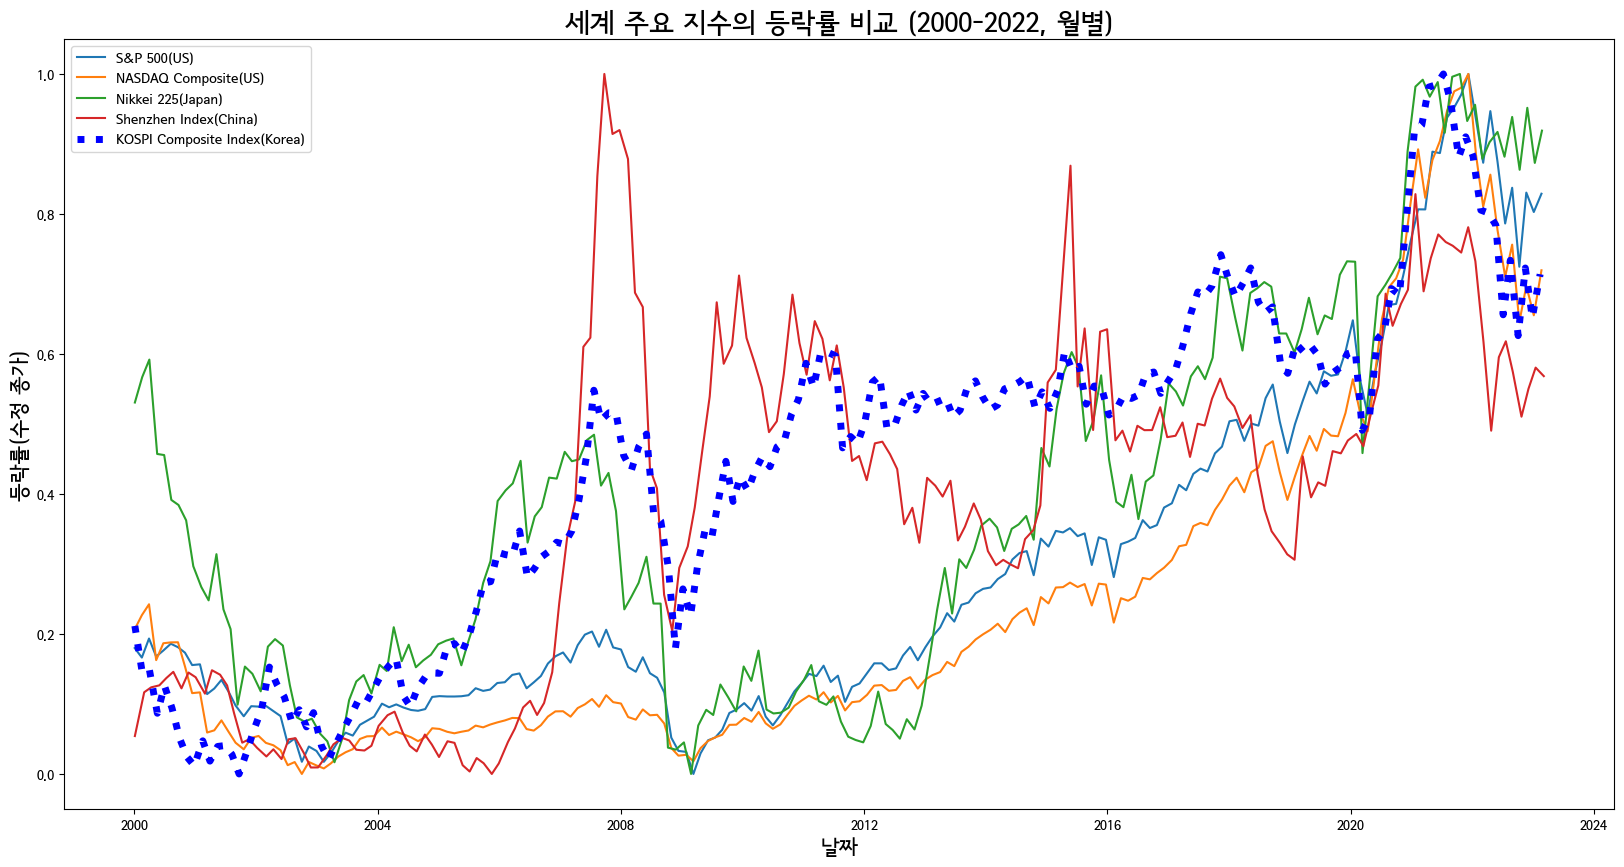

In [10]:
# Visualization: 세계 주요 지수의 등락률 비교 (2000-2022, 월별)

mpl.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)

fig = plt.figure( figsize=(20, 10)) # 그래프 크기 조절

for index in WORLD_INDEX_TICKERS:

    index_df    = get_world_index(index['ticker'])[['Close']][::30]
    index_df[:] = get_normalization(index_df)
    
    if index['ticker'] == '^KS11':
        ax1 = sns.lineplot(
            data      = index_df,
            x         = 'Date',
            y         = 'Close',
            label     = index['name'] + f"({index['nation']})",
            color     = 'blue',
            linewidth = 5,
            linestyle = ':'
            
        )
    else:
        ax1 = sns.lineplot(
            data    = index_df,
            x       = 'Date',
            y       = 'Close',
            label   = index['name'] + f"({index['nation']})",
        )
    
plt.title('세계 주요 지수의 등락률 비교 (2000-2022, 월별)', fontsize=20)
plt.ylabel('등락률(수정 종가)', fontsize=15)
plt.xlabel('날짜', fontsize=15)
plt.legend(loc = 'upper left')
sns.set_theme(style='whitegrid')
plt.show()

### 세계 지수와 코스피 지수는 전체적인 동향은 비슷하지만 각각의 변화폭에 유의미한 차이가 있으므로 투자의 비중을 반대로 분산해서 전략을 세우는 게 좋다고 판단되어진다. 

# #2 KOSPI와 KOSPI에 대한 RSI 14간 상관관계

## Data 전처리

In [11]:
tmp = []
for ticker in stock.get_index_ticker_list():
    tmp.append([ticker, stock.get_index_ticker_name(ticker)])

# 데이터 프레임 생성
scale_2022 = pd.DataFrame(tmp).iloc[:4,:]

# 열 명 변경
scale_2022.columns = ['ticker','name2022']

# DataFrame 구축

# DF 생성
df_scale_day = pd.DataFrame([])          # 일단위 데이터
df_scale_month = pd.DataFrame([])        # 월단위 데이터
df_scale_year = pd.DataFrame([])         # 년단위 데이터

# DF 내용 쓰기
for j in range(scale_2022.iloc[:,0].count()):
    # ticker 값을 i에 저장
    i = scale_2022.iloc[j,0]
    
    # temp DF에 2000.01.01~2022.12.31 규모별 ohlcv와 fundamental 쓰기(merge 이용하여 옆으로 붙임.)
    temp_day = pd.merge(stock.get_index_ohlcv("20030301", "20221231", str(i)).reset_index(), 
                     stock.get_index_fundamental("20030301", "20221231", str(i)).reset_index(), 
                     how='outer')
    temp_month = stock.get_index_ohlcv("20030301", "20221231", str(i),'m').reset_index()
                
    temp_year = stock.get_index_ohlcv("20030301", "20211231", str(i),'y').reset_index()
    
    # 해당 섹터 ticker, 섹터 명칭 쓰기
    temp_day['scale_name'] = stock.get_index_ticker_name(i)
    temp_day['scale_ticker'] = i
    
    temp_month['scale_name'] = stock.get_index_ticker_name(i)
    temp_month['scale_ticker'] = i
    
    temp_year['scale_name'] = stock.get_index_ticker_name(i)
    temp_year['scale_ticker'] = i
    
    # 임시 DF를 결과물 DF에 합치기
    df_scale_day = pd.concat([df_scale_day,temp_day])
    df_scale_month = pd.concat([df_scale_month,temp_month])
    df_scale_year = pd.concat([df_scale_year,temp_year])

# 칼럼명 영어로 변환
df_scale_day.columns = ['date','Open','High','Low','Close','Volume','Volume($)',
                     'Market_Cap','Change','PER','FWDPER','PBR','dividend_Yield','scale_name','scale_ticker']
df_scale_month.columns = ['date','Open','High','Low','Close','Volume','Volume($)','scale_name','scale_ticker']
df_scale_year.columns = ['date','Open','High','Low','Close','Volume','Volume($)','scale_name','scale_ticker']

# 일별 데이터를 규모별로 분리
df_scale_day_kospi = df_scale_day[df_scale_day['scale_name']=='코스피'] 
df_scale_day_small = df_scale_day[df_scale_day['scale_name']=='코스피 소형주']
df_scale_day_medium = df_scale_day[df_scale_day['scale_name']=='코스피 중형주']
df_scale_day_large = df_scale_day[df_scale_day['scale_name']=='코스피 대형주']

# 월별 데이터를 규모별로 분리
df_scale_month_kospi = df_scale_month[df_scale_month['scale_name']=='코스피']
df_scale_month_small = df_scale_month[df_scale_month['scale_name']=='코스피 소형주']
df_scale_month_medium = df_scale_month[df_scale_month['scale_name']=='코스피 중형주']
df_scale_month_large = df_scale_month[df_scale_month['scale_name']=='코스피 대형주']

# 연도별 데이터를 규모별로 분리
df_scale_year_kospi = df_scale_year[df_scale_year['scale_name']=='코스피']
df_scale_year_small = df_scale_year[df_scale_year['scale_name']=='코스피 소형주']
df_scale_year_medium = df_scale_year[df_scale_year['scale_name']=='코스피 중형주']
df_scale_year_large = df_scale_year[df_scale_year['scale_name']=='코스피 대형주']

df_scale_year_kospi_index = (df_scale_year_kospi['Close'] / df_scale_year_kospi['Close'][0]) * 100
df_scale_year_small_index = (df_scale_year_small['Close'] / df_scale_year_small['Close'][0]) * 100
df_scale_year_medium_index = (df_scale_year_medium['Close'] / df_scale_year_medium['Close'][0]) * 100
df_scale_year_large_index = (df_scale_year_large['Close'] / df_scale_year_large['Close'][0]) * 100

df_scale_month_kospi_index = (df_scale_month_kospi['Close'] / df_scale_month_kospi['Close'][0]) * 100
df_scale_month_small_index = (df_scale_month_small['Close'] / df_scale_month_small['Close'][0]) * 100
df_scale_month_medium_index = (df_scale_month_medium['Close'] / df_scale_month_medium['Close'][0]) * 100
df_scale_month_large_index = (df_scale_month_large['Close'] / df_scale_month_large['Close'][0]) * 100

df_scale_day_kospi_index = (df_scale_day_kospi['Close'] / df_scale_day_kospi['Close'][0]) * 100
df_scale_day_small_index = (df_scale_day_small['Close'] / df_scale_day_small['Close'][0]) * 100
df_scale_day_medium_index = (df_scale_day_medium['Close'] / df_scale_day_medium['Close'][0]) * 100
df_scale_day_large_index = (df_scale_day_large['Close'] / df_scale_day_large['Close'][0]) * 100

In [12]:
# 일별 데이터 RSI(14) 컬럼 추가
df_scale_day_kospi = get_RSI(df_scale_day_kospi)
df_scale_day_large = get_RSI(df_scale_day_large)
df_scale_day_medium = get_RSI(df_scale_day_medium)
df_scale_day_small = get_RSI(df_scale_day_small)

# 월별 데이터 RSI(14) 컬럼 추가
df_scale_month_kospi = get_RSI(df_scale_month_kospi)
df_scale_month_large = get_RSI(df_scale_month_large)
df_scale_month_medium = get_RSI(df_scale_month_medium)
df_scale_month_small = get_RSI(df_scale_month_small)

# 년별 데이터 RSI(14) 컬럼 추가
df_scale_year_kospi = get_RSI(df_scale_year_kospi)
df_scale_year_large = get_RSI(df_scale_year_large)
df_scale_year_medium = get_RSI(df_scale_year_medium)
df_scale_year_small = get_RSI(df_scale_year_small)

df_scale_day_kospi_index = (df_scale_day_kospi['Close'] / df_scale_day_kospi['Close'][0]) * 100
df_scale_day_small_index = (df_scale_day_small['Close'] / df_scale_day_small['Close'][0]) * 100
df_scale_day_medium_index = (df_scale_day_medium['Close'] / df_scale_day_medium['Close'][0]) * 100
df_scale_day_large_index = (df_scale_day_large['Close'] / df_scale_day_large['Close'][0]) * 100

## KOSPI & RSI 14 (연별)

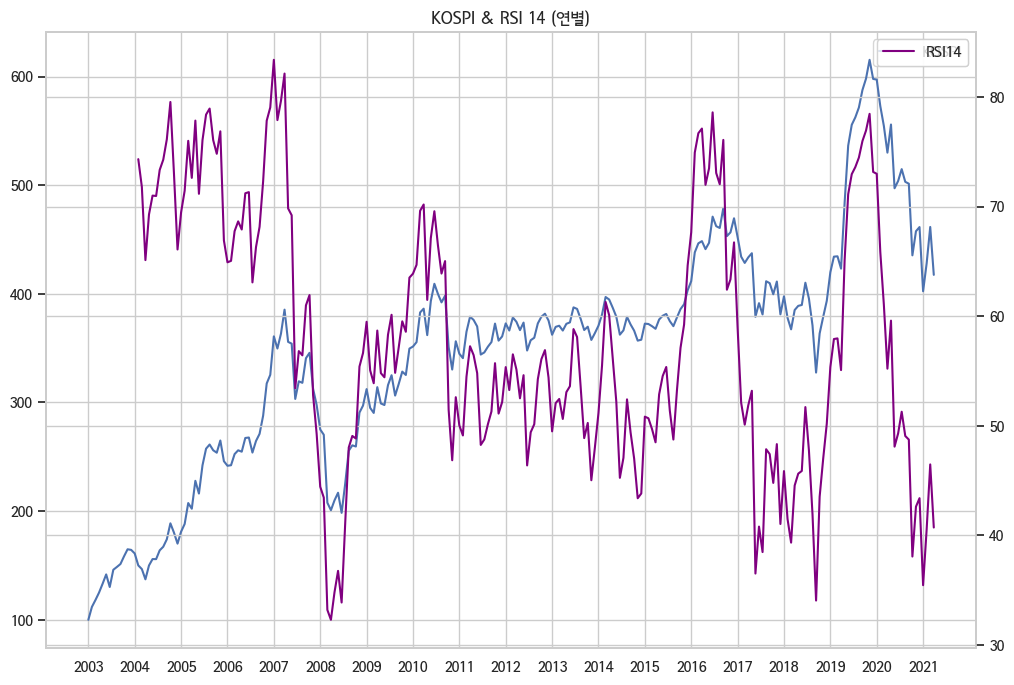

In [13]:
# Visualization: KOSPI & RSI 14 (연별)

mpl.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)

fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot()
ax1.plot(df_scale_month_kospi_index,label="KOSPI")
plt.legend()
color = 'purple'
ax2 = ax1.twinx()
ax2.plot(df_scale_month_kospi['RSI14'],label="RSI14",color=color)
plt.legend()

plt.xticks(list(i for i in range(0,240,13)),df_scale_year_kospi['date'].dt.year.unique())
plt.title("KOSPI & RSI 14 (연별)")
plt.show()

## KOSPI & RSI 14 (월별)

In [14]:
# Visualization: KOSPI & RSI 14 (Candle 차트, 월별)

mpl.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)

candle = go.Candlestick(
x=df_scale_month_kospi.index,
open=df_scale_month_kospi['Open'],
high=df_scale_month_kospi['High'],
low=df_scale_month_kospi['Low'],
close=df_scale_month_kospi['Close'],
name='KOSPI')

RSI = go.Scatter(x=df_scale_month_kospi['date'], y=df_scale_month_kospi['RSI14'], line=dict(color='purple', width=2), name='RSI')

fig = ms.make_subplots(rows=5, cols=1, specs=[[{'rowspan':4}],[None],[None],[None],[{}]]
,shared_xaxes=True, horizontal_spacing=0.03, vertical_spacing=0.05)
fig.add_trace(candle,row=1,col=1)
fig.add_trace(RSI,row=5,col=1)
fig.update_layout(width=1000, height=800, xaxis_rangeslider_visible=False,title_text="KOSPI & RSI 14 (월별)", title_x=0.5)

fig.show()

## KOSPI & RSI 14 일별

In [15]:
# Visualization: KOSPI & RSI 14 (Candle 차트, 일별)

mpl.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)

candle = go.Candlestick(
x=df_scale_day_kospi.index,
open=df_scale_day_kospi['Open'],
high=df_scale_day_kospi['High'],
low=df_scale_day_kospi['Low'],
close=df_scale_day_kospi['Close'],
name='KOSPI')

RSI = go.Scatter(x=df_scale_day_kospi['date'], y=df_scale_day_kospi['RSI14'], line=dict(color='purple', width=2), name='RSI')

fig = ms.make_subplots(rows=5, cols=1, specs=[[{'rowspan':4}],[None],[None],[None],[{}]]
,shared_xaxes=True, horizontal_spacing=0.03, vertical_spacing=0.05)
fig.add_trace(candle,row=1,col=1)
fig.add_trace(RSI,row=5,col=1)
fig.update_layout(width=1000, height=800, xaxis_rangeslider_visible=False,title_text="KOSPI & RSI14 (일별)", title_x=0.5)

fig.show()

## KOSPI & RSI 50

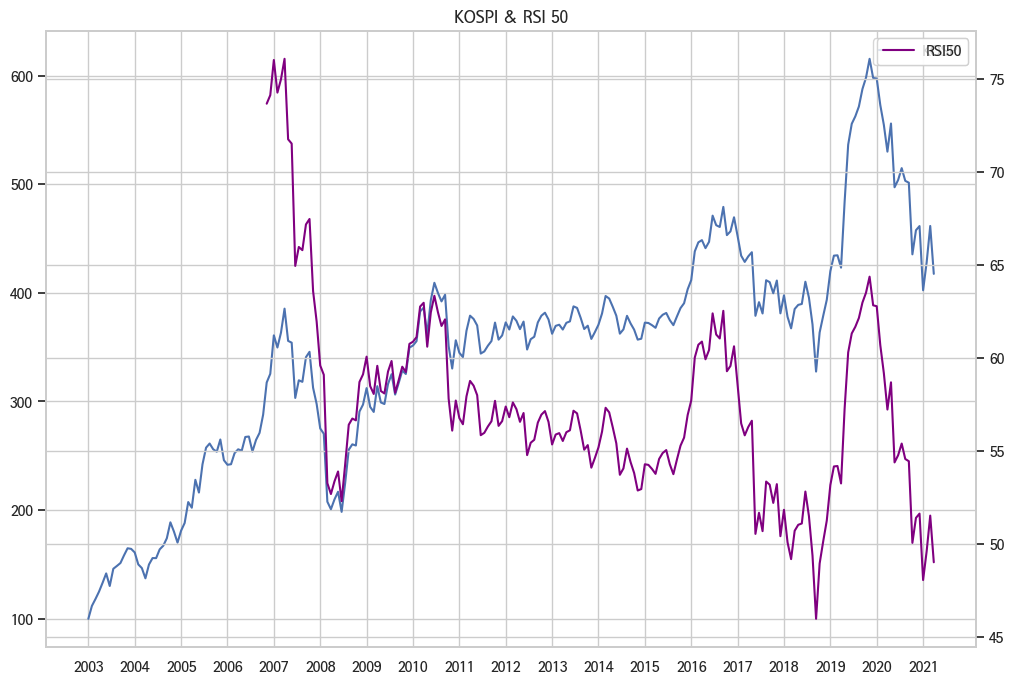

In [16]:
# Visualization: KOSPI & RSI 50

mpl.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)

fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot()
ax1.plot(df_scale_month_kospi_index,label="KOSPI")
plt.legend()
color = 'purple'
ax2 = ax1.twinx()
ax2.plot(df_scale_month_kospi['RSI50'],label="RSI50",color=color)
plt.legend()

plt.xticks(list(i for i in range(0,240,13)),df_scale_year_kospi['date'].dt.year.unique())
plt.title("KOSPI & RSI 50")
plt.show()

## KOSPI & RSI 200

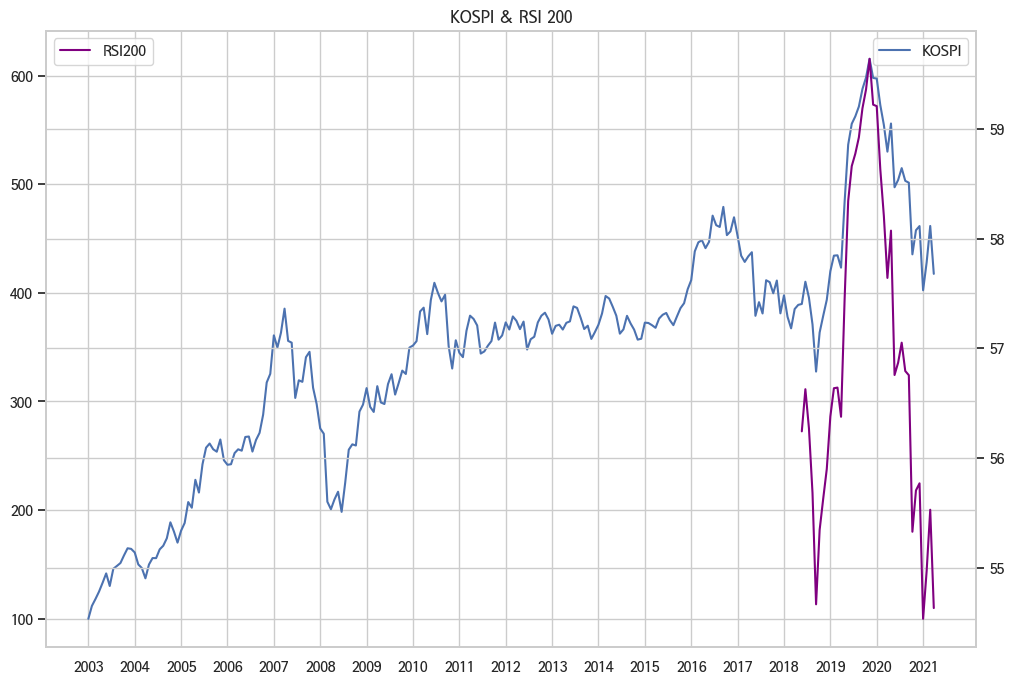

In [17]:
# Visualization: KOSPI & RSI 200

mpl.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)

fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot()
ax1.plot(df_scale_month_kospi_index,label="KOSPI")
plt.legend()
color = 'purple'
ax2 = ax1.twinx()
ax2.plot(df_scale_month_kospi['RSI200'],label="RSI200",color=color)
plt.legend()

plt.xticks(list(i for i in range(0,240,13)),df_scale_year_kospi['date'].dt.year.unique())
plt.title("KOSPI & RSI 200")
plt.show()

## RSI 14 지표를 통한 투자 전략

In [18]:
# 코스피, 대형주, 중형주, 소형주에 해당하는 각 종목들 불러오기
large = stock.get_index_portfolio_deposit_file("1002")
#large.remove('450140')
large

['005930',
 '373220',
 '000660',
 '207940',
 '006400',
 '051910',
 '005380',
 '035420',
 '000270',
 '035720',
 '005490',
 '068270',
 '028260',
 '012330',
 '003670',
 '105560',
 '066570',
 '055550',
 '096770',
 '003550',
 '032830',
 '034730',
 '086790',
 '033780',
 '323410',
 '009150',
 '015760',
 '034020',
 '017670',
 '010130',
 '011200',
 '000810',
 '018260',
 '051900',
 '329180',
 '259960',
 '010950',
 '003490',
 '036570',
 '316140',
 '009830',
 '377300',
 '352820',
 '024110',
 '030200',
 '011170',
 '090430',
 '138040',
 '011070',
 '028050',
 '086280',
 '251270',
 '034220',
 '271560',
 '302440',
 '402340',
 '383220',
 '009540',
 '005830',
 '088980',
 '326030',
 '032640',
 '012450',
 '097950',
 '361610',
 '267250',
 '004020',
 '010140',
 '018880',
 '047810',
 '011780',
 '241560',
 '161390',
 '035250',
 '008560',
 '000720',
 '011790',
 '006800',
 '000100',
 '021240',
 '078930',
 '047050',
 '029780',
 '128940',
 '002790',
 '307950',
 '282330',
 '008770',
 '071050',
 '112610',
 '004990',

In [19]:
Large = ['Samsung','LG에너지솔루션','SK하이닉스','삼성바이오로직스','동원산업','LG화학','현대차','Naver','KaKao','기아','Posco홀딩스','셀트리온','KB금융','삼성물산','신한지주','현대모비스','포스코케미칼','LG전자','SK이노베이션']

In [20]:
# 코스피 RSI 백테스팅 수익률에대한 통계치
kospi_stocks_yeild = scale_rsi_backtesting2(large)
kospi_stocks_yeild

005930: get_market_ohlcv 처리 완료, 소요 시간: 4.25s
005930: get_RSI_OHLCV2 처리 완료, 소요 시간: 4.25s
005930: preprocessing_rsi_backtesting_OHLCV2 처리 완료, 소요 시간: 4.25s
373220: get_market_ohlcv 처리 완료, 소요 시간: 0.4s
373220: get_RSI_OHLCV2 처리 완료, 소요 시간: 0.4s
373220: preprocessing_rsi_backtesting_OHLCV2 처리 완료, 소요 시간: 0.41s
000660: get_market_ohlcv 처리 완료, 소요 시간: 1.1s
000660: get_RSI_OHLCV2 처리 완료, 소요 시간: 1.1s
000660: preprocessing_rsi_backtesting_OHLCV2 처리 완료, 소요 시간: 1.11s
207940: get_market_ohlcv 처리 완료, 소요 시간: 1.45s
207940: get_RSI_OHLCV2 처리 완료, 소요 시간: 1.46s
207940: preprocessing_rsi_backtesting_OHLCV2 처리 완료, 소요 시간: 1.46s
006400: get_market_ohlcv 처리 완료, 소요 시간: 1.39s
006400: get_RSI_OHLCV2 처리 완료, 소요 시간: 1.39s
006400: preprocessing_rsi_backtesting_OHLCV2 처리 완료, 소요 시간: 1.4s
051910: get_market_ohlcv 처리 완료, 소요 시간: 1.46s
051910: get_RSI_OHLCV2 처리 완료, 소요 시간: 1.46s
051910: preprocessing_rsi_backtesting_OHLCV2 처리 완료, 소요 시간: 1.47s
005380: get_market_ohlcv 처리 완료, 소요 시간: 1.52s
005380: get_RSI_OHLCV2 처리 완료, 소요 시간: 1.53s

0     1.007394
1     1.076216
2     1.019316
3     1.737675
4     1.421946
        ...   
95    2.349926
96    2.229513
97    0.979136
98    2.664599
99    0.910368
Length: 100, dtype: float64

In [21]:
kospi_stocks_yeild.index = large

In [22]:
kospi_stocks_yeild

005930    1.007394
373220    1.076216
000660    1.019316
207940    1.737675
006400    1.421946
            ...   
010620    2.349926
064350    2.229513
016360    0.979136
036460    2.664599
137310    0.910368
Length: 100, dtype: float64

In [23]:
df_scale_day_large_rsi = preprocessing_rsi_backtesting(df_scale_day_large)
df_scale_day_large_rsi.RSI14.dropna()

date
2003-03-21    45.826105
2003-03-24    43.759398
2003-03-25    39.309648
2003-03-26    39.039728
2003-03-27    37.332869
                ...    
2022-12-23    37.550927
2022-12-26    38.427253
2022-12-27    41.310867
2022-12-28    33.839373
2022-12-29    29.520102
Name: RSI14, Length: 4892, dtype: float64

In [24]:
c_df = df_scale_day_large_rsi.dropna().query('RSI14 <= 30')
c_visits = c_df['RSI14']
c_df

Open     High      Low    Close     Volume      Volume($)  \
date                                                                       
2004-05-10   830.78   830.92   769.26   789.40  114411783  2396994052650   
2004-05-11   788.96   800.64   775.19   788.10  113525849  2204450769494   
2004-05-13   809.75   811.12   783.58   783.58   93937009  1986120479340   
2004-05-14   792.39   796.05   751.05   759.83  117358831  2420338270790   
2004-05-17   757.99   765.29   716.47   720.48  117712162  2271760437130   
...             ...      ...      ...      ...        ...            ...   
2022-09-27  2193.14  2195.01  2167.21  2191.30  101873979  5271377462937   
2022-09-28  2172.57  2189.80  2121.72  2139.16  111521194  5954166749882   
2022-09-29  2167.82  2179.01  2140.23  2141.51   88938631  4776722134595   
2022-09-30  2132.78  2149.92  2106.60  2126.99  105300843  5476681435451   
2022-12-29  2229.71  2238.51  2203.44  2203.44   70718517  3877058844740   

                  Market_Cap  Change    PER  FWDPER  ...      RSI14  \
date                                                 ...              
2004-05-10   292244195060015   -5.83  12.54     0.0  ...  23.859243   
2004-05-11   291761915492765   -0.16  12.52     0.0  ...  23.684489   
2004-05-13   290028153201100   -3.67  12.45     0.0  ...  28.959191   
2004-05-14   281238362186820   -3.03  12.07     0.0  ...  25.766932   
2004-05-17   265250034510480   -5.18  11.45     0.0  ...  21.531873   
...                      ...     ...    ...     ...  ...        ...   
2022-09-27  1392150720520030    0.09   9.49     0.0  ...  26.238351   
2022-09-28  1359023699150910   -2.38   9.27     0.0  ...  22.454594   
2022-09-29  1360516436371845    0.11   9.28     0.0  ...  22.993602   
2022-09-30  1351291906019195   -0.68   9.21     0.0  ...  21.977134   
2022-12-29  1398386844902810   -1.86  10.75     0.0  ...  29.520102   

                RSI30      RSI50     RSI200  매매신호     일간수익률   보유여부     보유수익률  \
date                                                                           
2004-05-10  36.103111  42.808390  52.959382  True  0.941746  False  1.000000   
2004-05-11  35.957273  42.695137  52.920328  True  0.998353   True  0.998353   
2004-05-13  37.352159  42.976775  52.701916  True  0.963280   True  0.963280   
2004-05-14  34.935039  41.086083  52.012345  True  0.969690   True  0.969690   
2004-05-17  31.447110  38.241754  50.903280  True  0.948212   True  0.948212   
...               ...        ...        ...   ...       ...    ...       ...   
2022-09-27  35.431716  39.071302  45.362461  True  1.000914   True  1.000914   
2022-09-28  32.826155  37.318393  44.859879  True  0.976206   True  0.976206   
2022-09-29  33.055687  37.447460  44.887538  True  1.001099   True  1.001099   
2022-09-30  32.349161  36.967538  44.748152  True  0.993220   True  0.993220   
2022-12-29  39.476981  42.913896  46.342994  True  0.981427  False  1.000000   

              RSI수익률   단순보유수익률  
date                            
2004-05-10  1.000000  1.399894  
2004-05-11  0.998353  1.397588  
2004-05-13  0.992627  1.389573  
2004-05-14  0.962541  1.347455  
2004-05-17  0.912693  1.277673  
...              ...       ...  
2022-09-27  1.233109  3.885973  
2022-09-28  1.203769  3.793509  
2022-09-29  1.205091  3.797677  
2022-09-30  1.196920  3.771928  
2022-12-29  1.349144  3.907501  

[162 rows x 24 columns]

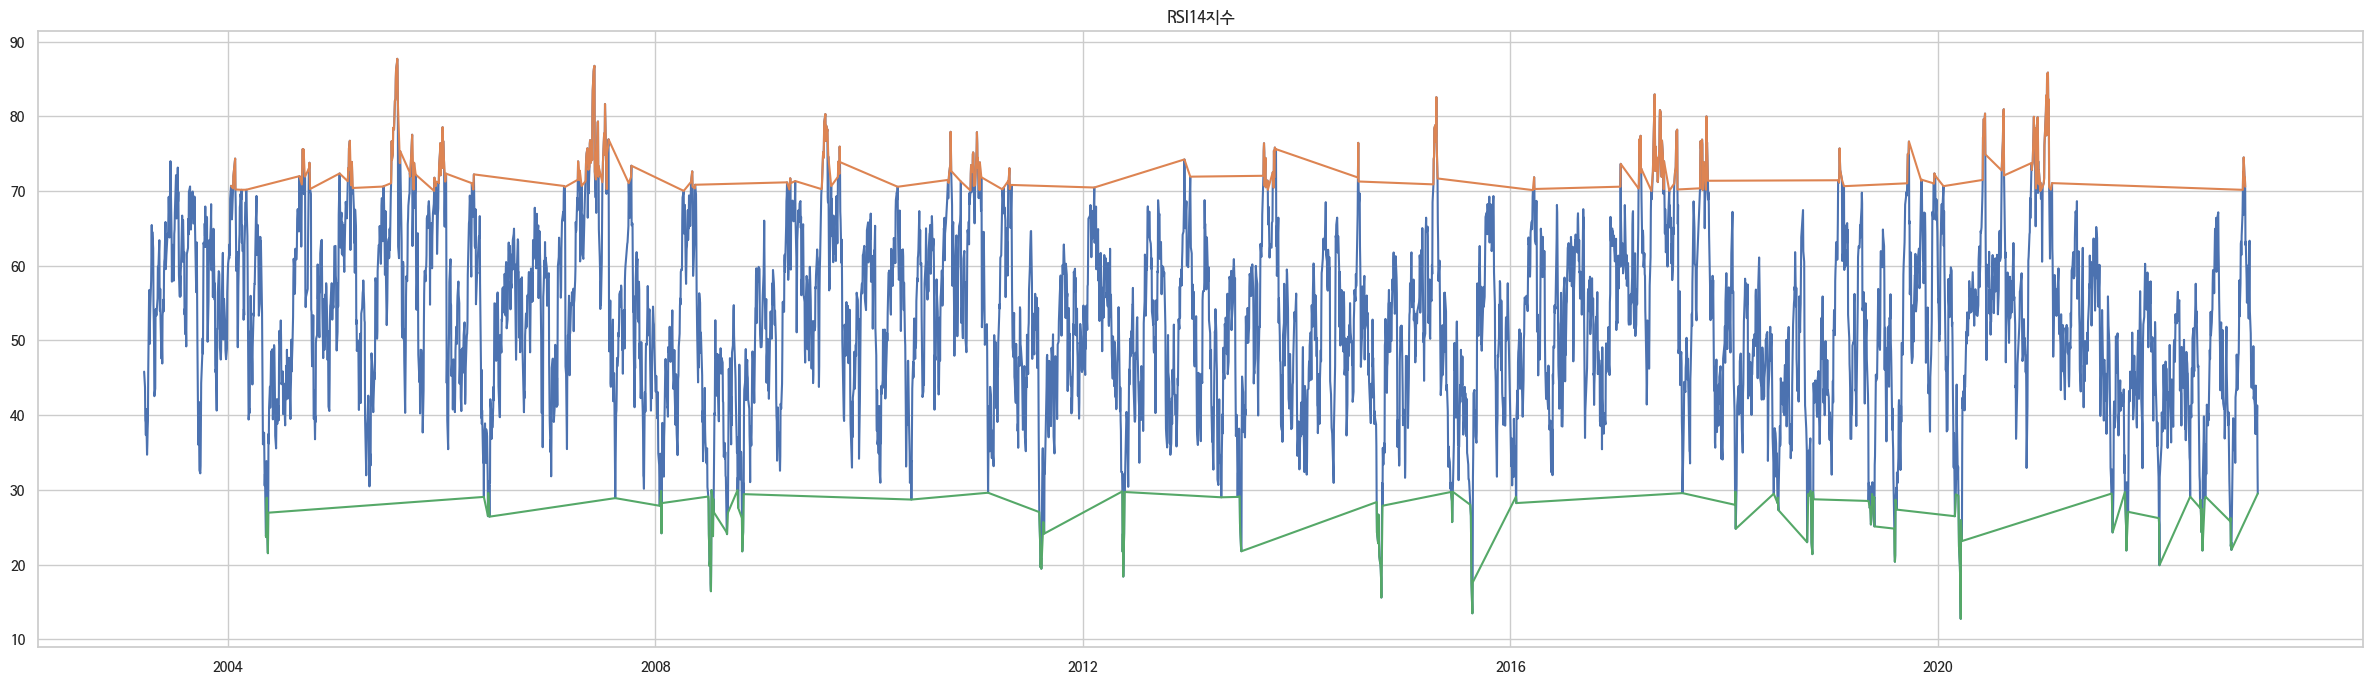

In [25]:
## 3개 데이터 분리

mpl.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)

b_df = df_scale_day_large_rsi.dropna().query('RSI14 >= 70')
b_visits = b_df['RSI14']
 
c_df = df_scale_day_large_rsi.dropna().query('RSI14 <= 30')
c_visits = c_df['RSI14']

fig=plt.figure(figsize = (30,8))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot()
ax.plot(df_scale_day_large_rsi.RSI14.dropna().index,df_scale_day_large_rsi.RSI14.dropna()) ## 선그래프 생성
ax.plot(b_df.index,b_visits,label='매도신호') 
ax.plot(c_df.index,c_visits,label='매수신호')
plt.title('RSI14지수')
plt.show()

## RSI 백테스팅을 통한 코스피대형주수익률 (2020~2022)

In [26]:
kospi_stocks_yeild.describe()

count    100.000000
mean       1.509123
std        0.681493
min        0.318318
25%        1.016335
50%        1.367171
75%        1.853550
max        3.797914
dtype: float64

In [27]:
large_yeild = kospi_stocks_yeild.describe().to_frame().T['mean'].values[0]
large_yeild

1.509122813866825

In [28]:
df_scale_day_large_rsi['RSI수익률']

date
2003-03-03    1.000000
2003-03-04    1.000000
2003-03-05    1.000000
2003-03-06    1.000000
2003-03-07    1.000000
                ...   
2022-12-23    1.349144
2022-12-26    1.349144
2022-12-27    1.349144
2022-12-28    1.349144
2022-12-29    1.349144
Name: RSI수익률, Length: 4906, dtype: float64

In [29]:
Large

['Samsung',
 'LG에너지솔루션',
 'SK하이닉스',
 '삼성바이오로직스',
 '동원산업',
 'LG화학',
 '현대차',
 'Naver',
 'KaKao',
 '기아',
 'Posco홀딩스',
 '셀트리온',
 'KB금융',
 '삼성물산',
 '신한지주',
 '현대모비스',
 '포스코케미칼',
 'LG전자',
 'SK이노베이션']

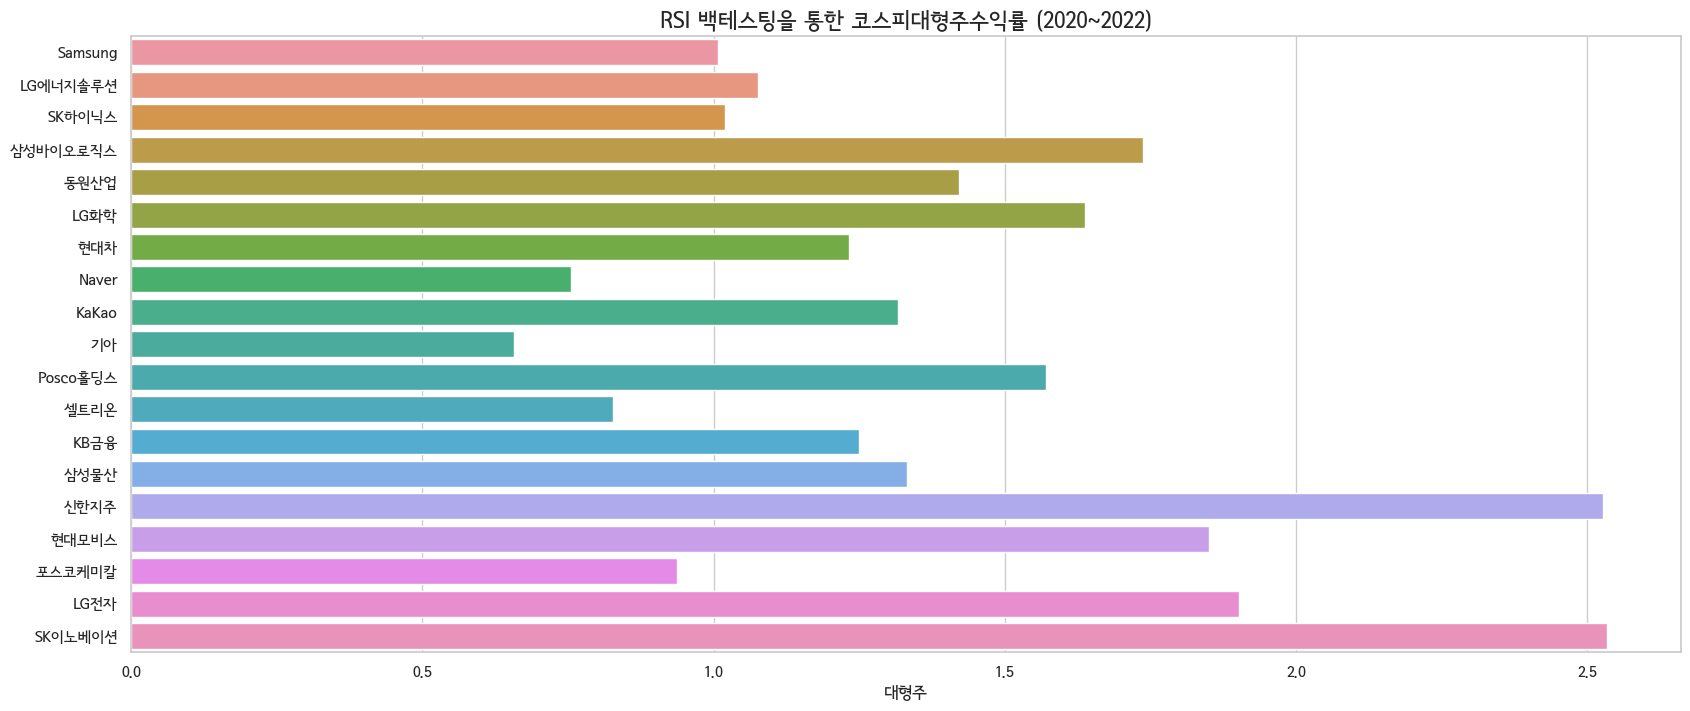

In [30]:
# Visualization: RSI 백테스팅을 통한 코스피대형주수익률 (2020~2022)

mpl.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)

fig = plt.figure(figsize=(20,8))
plt.title("RSI 백테스팅을 통한 코스피대형주수익률 (2020~2022)",size=16)
sns.barplot(x = kospi_stocks_yeild[:19], y = Large,label="Large-cap")
plt.xlabel('대형주')
plt.show()

In [31]:
kospi_stocks_yeild[:19]

005930    1.007394
373220    1.076216
000660    1.019316
207940    1.737675
006400    1.421946
051910    1.637917
005380    1.233183
035420    0.754569
000270    1.316472
035720    0.658360
005490    1.570177
068270    0.827835
028260    1.250218
012330    1.332399
003670    2.527158
105560    1.849736
066570    0.936907
055550    1.901516
096770    2.533941
dtype: float64

# #3 코스피 종목의 PER, PBR과 코스피 지수와의 연관성 분석

- 코로나 팬데믹이 시작된 2021년 12월 30일을 기준시점으로 선정하여 팬데믹으로 인한 세계 증시가 전체적으로 하락장에 들어섰다.
- 이러한 하락장 속에서도 PER과 PBR 상위 15개, 하위 15개 종목들의 주가가 띄는 경향성을 분석한다.

## Data 전처리

In [32]:
df_scale_yeild = pd.DataFrame(data=[large_yeild],index=['대형주'],columns=['수익률'])

In [33]:
# Data Load
per_kospi = pd.read_csv('https://drive.google.com/uc?id=1UM6bCKmDWrDo5ROlMq990hfA9fTrgJAm', encoding='cp949') # 코스피 종목 
kospi_df = stock.get_index_fundamental("2000-01-01", "2022-12-31", "1001") # 코스피

# kospi 슬라이싱
kospi_short = kospi_df[['종가']]
kospi_short = kospi_short.reset_index(drop=False)
kospi_short.rename(columns={'날짜':'Date', '종가':'Close'}, inplace=True)
kospi_short = kospi_short[kospi_short['Date'] >= '2021-12-30']

# 코스피 종목
per_kospi = per_kospi[['종목코드', '종목명', 'PER', 'PBR']]
per_kospi = per_kospi[per_kospi['PER'].notnull()]

# PER PBR에 따라 상하위 종목 나누기
lowper_kospi = per_kospi.sort_values(by=['PER', 'PBR']).head(15)
highper_kospi = per_kospi.sort_values(by=['PER', 'PBR'], ascending=False).head(15)
lowpbr_kospi = per_kospi.sort_values(by=['PBR', 'PER']).head(15)
highpbr_kospi = per_kospi.sort_values(by=['PBR', 'PER'], ascending=False).head(15)

df_lowper = pd.DataFrame()
df_highper = pd.DataFrame()
df_lowpbr = pd.DataFrame()
df_highpbr = pd.DataFrame()

for ticker in list(lowper_kospi['종목코드']):
    df = stock.get_market_ohlcv_by_date(fromdate="2021-12-30", todate="2022-12-31", ticker=ticker)
    df = df.assign(종목코드=ticker, 종목명=stock.get_market_ticker_name(ticker)) # 새 컬럼 할당
    df_lowper = pd.concat([df_lowper, df], axis=0)
    time.sleep(1) # 일정 시간 프로세스 제어
df_lowper = df_lowper.reset_index()
df_lowper.rename(columns={'날짜':'Date', '종가':'Close'}, inplace=True)
df_lowper['Date'] = pd.to_datetime(df_lowper['Date'])

for ticker in list(highper_kospi['종목코드']):
    df = stock.get_market_ohlcv_by_date(fromdate="2021-12-30", todate="2022-12-31", ticker=ticker)
    df = df.assign(종목코드=ticker, 종목명=stock.get_market_ticker_name(ticker))
    df_highper = pd.concat([df_highper, df], axis=0)
    time.sleep(1)
df_highper = df_highper.reset_index()
df_highper.rename(columns={'날짜':'Date', '종가':'Close'}, inplace=True)
df_highper['Date'] = pd.to_datetime(df_highper['Date'])

for ticker in list(lowpbr_kospi['종목코드']):
    df = stock.get_market_ohlcv_by_date(fromdate="2021-12-30", todate="2022-12-31", ticker=ticker)
    df = df.assign(종목코드=ticker, 종목명=stock.get_market_ticker_name(ticker))
    df_lowpbr = pd.concat([df_lowpbr, df], axis=0)
    time.sleep(1)
df_lowpbr = df_lowpbr.reset_index()
df_lowpbr.rename(columns={'날짜':'Date', '종가':'Close'}, inplace=True)
df_lowpbr['Date'] = pd.to_datetime(df_lowpbr['Date'])

for ticker in list(highpbr_kospi['종목코드']):
    df = stock.get_market_ohlcv_by_date(fromdate="2021-12-30", todate="2022-12-31", ticker=ticker)
    df = df.assign(종목코드=ticker, 종목명=stock.get_market_ticker_name(ticker))
    df_highpbr = pd.concat([df_highpbr, df], axis=0)
    time.sleep(1)
df_highpbr = df_highpbr.reset_index()
df_highpbr.rename(columns={'날짜':'Date', '종가':'Close'}, inplace=True)
df_highpbr['Date'] = pd.to_datetime(df_highpbr['Date'])

# 코스피 보유수익률 계산
kospi_yeild = pd.DataFrame(kospi_short['Close']/kospi_short.iloc[0, 1]) # 첫 날 kospi가격으로 나누어서 수익률 계산 후 합침.
kospi_yeild = pd.concat([kospi_short[['Date']], kospi_yeild], axis=1)

# 종목별 보유수익률 계산
lowper_list = list(df_lowper['종목명'].unique())
highper_list = list(df_highper['종목명'].unique())
lowpbr_list = list(df_lowpbr['종목명'].unique())
highpbr_list = list(df_highpbr['종목명'].unique())

lowper_yeild = pd.DataFrame()
for name in lowper_list:
    temp = df_lowper[df_lowper['종목명'] == name][['Date', 'Close']]
    temp = pd.DataFrame(temp['Close']/temp.iloc[0, 1])
    temp = temp.assign(종목명=name, Date=df_lowper['Date'])
    lowper_yeild = pd.concat([lowper_yeild, temp], axis=0)

highper_yeild = pd.DataFrame()
for name in highper_list:
    temp = df_highper[df_highper['종목명'] == name][['Date', 'Close']]
    temp = pd.DataFrame(temp['Close']/temp.iloc[0, 1])
    temp = temp.assign(종목명=name, Date=df_highper['Date'])
    highper_yeild = pd.concat([highper_yeild, temp], axis=0)
    
lowpbr_yeild = pd.DataFrame()
for name in lowpbr_list:
    temp = df_lowpbr[df_lowpbr['종목명'] == name][['Date', 'Close']]
    temp = pd.DataFrame(temp['Close']/temp.iloc[0, 1])
    temp = temp.assign(종목명=name, Date=df_lowpbr['Date'])
    lowpbr_yeild = pd.concat([lowpbr_yeild, temp], axis=0)
    
highpbr_yeild = pd.DataFrame()
for name in highpbr_list:
    temp = df_highpbr[df_highpbr['종목명'] == name][['Date', 'Close']]
    temp = pd.DataFrame(temp['Close']/temp.iloc[0, 1])
    temp = temp.assign(종목명=name, Date=df_highpbr['Date'])
    highpbr_yeild = pd.concat([highpbr_yeild, temp], axis=0)

## PER 하위 15개 종목과 코스피 보유수익률 비교

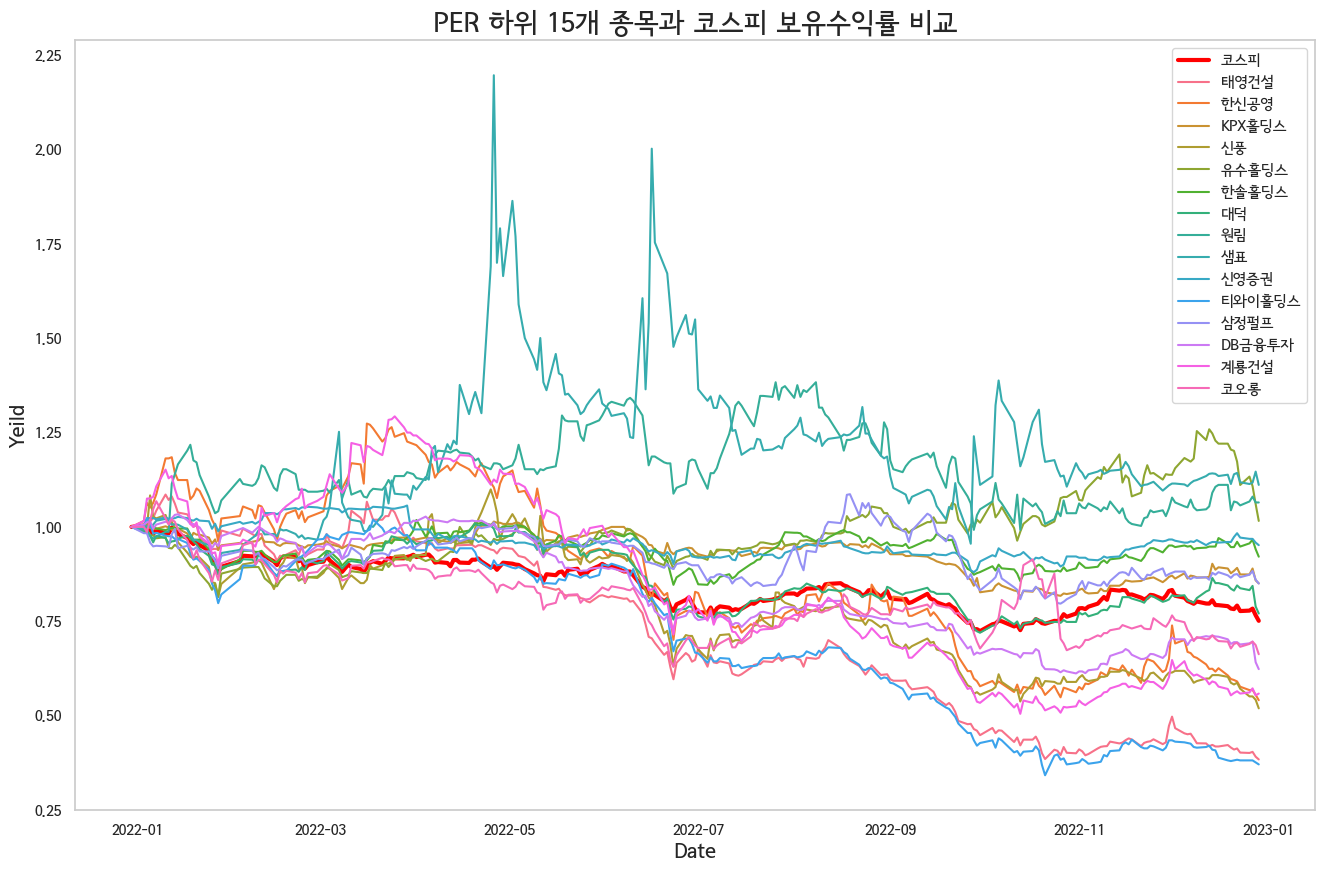

In [34]:
# Visualization: PER 하위 15개 종목과 코스피 보유수익률 비교

mpl.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)

fig = plt.figure( figsize=(16, 10)) # 그래프 크기 조절

ax1 = sns.lineplot(
    data=kospi_yeild,
    x = 'Date',
    y = 'Close',
    label = '코스피',
    color = 'red',
    linewidth = 3
)

ax2 = sns.lineplot(
    data=lowper_yeild,
    x = 'Date',
    y = 'Close',
    hue = '종목명'
)

plt.legend(loc = 'best')
plt.ylabel('Yeild', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.grid()

plt.title('PER 하위 15개 종목과 코스피 보유수익률 비교', fontsize=20)
plt.show()


### 코스피 보유 수익률보다 높은 수익률을 보이는 종목들이 다량 확인되었다.
- 일부 종목에서는 순간적인 주가 급등 현상도 있었음이 확인되었다.
- 따라서 하락장에서도 저 PER 종목을 종목 선정에 있어서 하나의 기준으로 삼아도 된다고 볼 수 있다.

## PER 상위 15개 종목과 코스피 보유수익률 비교

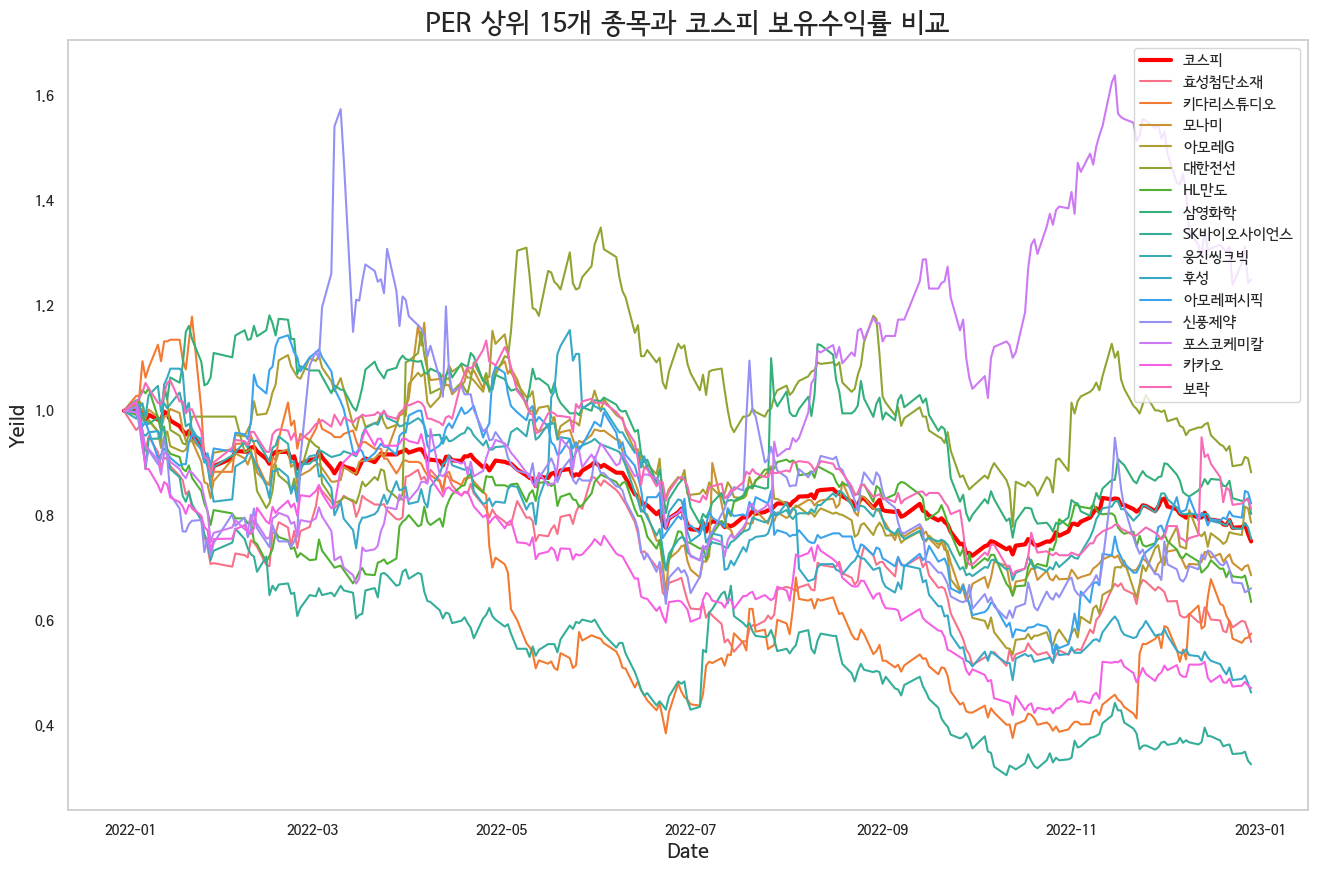

In [35]:
# Visualization: PER 상위 15개 종목과 코스피 보유수익률 비교

mpl.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)

fig = plt.figure( figsize=(16, 10)) # 그래프 크기 조절

ax1 = sns.lineplot(
    data=kospi_yeild,
    x = 'Date',
    y = 'Close',
    label = '코스피',
    color = 'red',
    linewidth = 3
)

ax2 = sns.lineplot(
    data=highper_yeild,
    x = 'Date',
    y = 'Close',
    hue = '종목명'
)

plt.legend(loc = 'best')
plt.ylabel('Yeild', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.grid()

plt.title('PER 상위 15개 종목과 코스피 보유수익률 비교', fontsize=20)
plt.show()


## PBR 하위 15개 종목과 코스피 보유수익률 비교

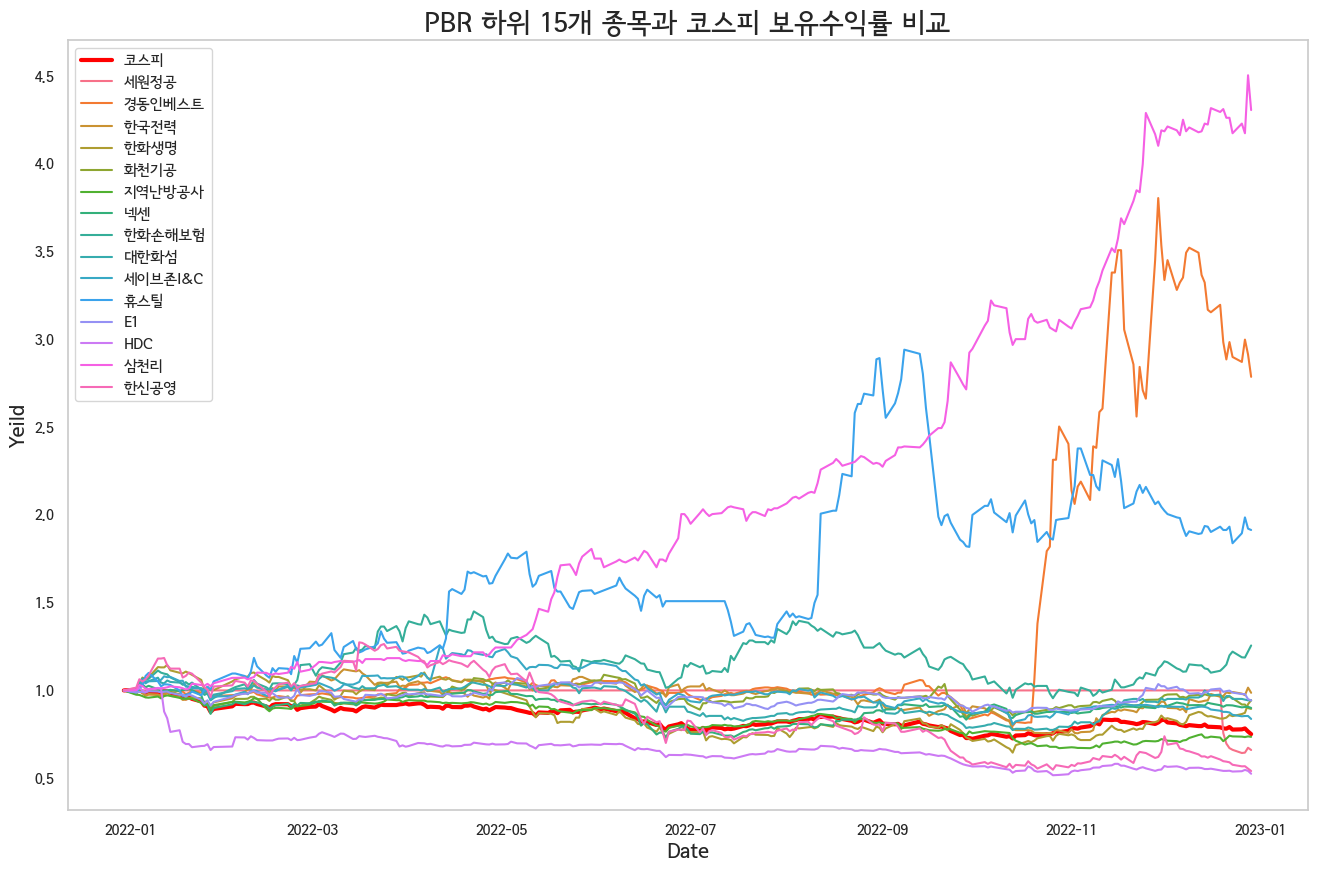

In [36]:
# Visualization: PBR 하위 15개 종목과 코스피 보유수익률 비교

mpl.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)

fig = plt.figure( figsize=(16, 10)) # 그래프 크기 조절

ax1 = sns.lineplot(
    data=kospi_yeild,
    x = 'Date',
    y = 'Close',
    label = '코스피',
    color = 'red',
    linewidth = 3
)

ax2 = sns.lineplot(
    data=lowpbr_yeild,
    x = 'Date',
    y = 'Close',
    hue = '종목명'
)

plt.legend(loc = 'best')
plt.ylabel('Yeild', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.grid()

plt.title('PBR 하위 15개 종목과 코스피 보유수익률 비교', fontsize=20)
plt.show()

### PER 하위 15개 종목들과 마찬가지로 코스피 보유 수익률보다 높은 수익률을 보이는 종목들이 다량 확인되었다.
- 일부 종목에서는 PER 하위 15개 종목에서는 볼 수 없는 폭발적인 주가 급등 경향성을 보였다.
- 따라서 하락장에서도 PBR 하위 15개 종목들은 투자 대상으로 매력이 있다 판단된다.

## PBR 상위 15개 종목과 코스피 보유수익률 비교

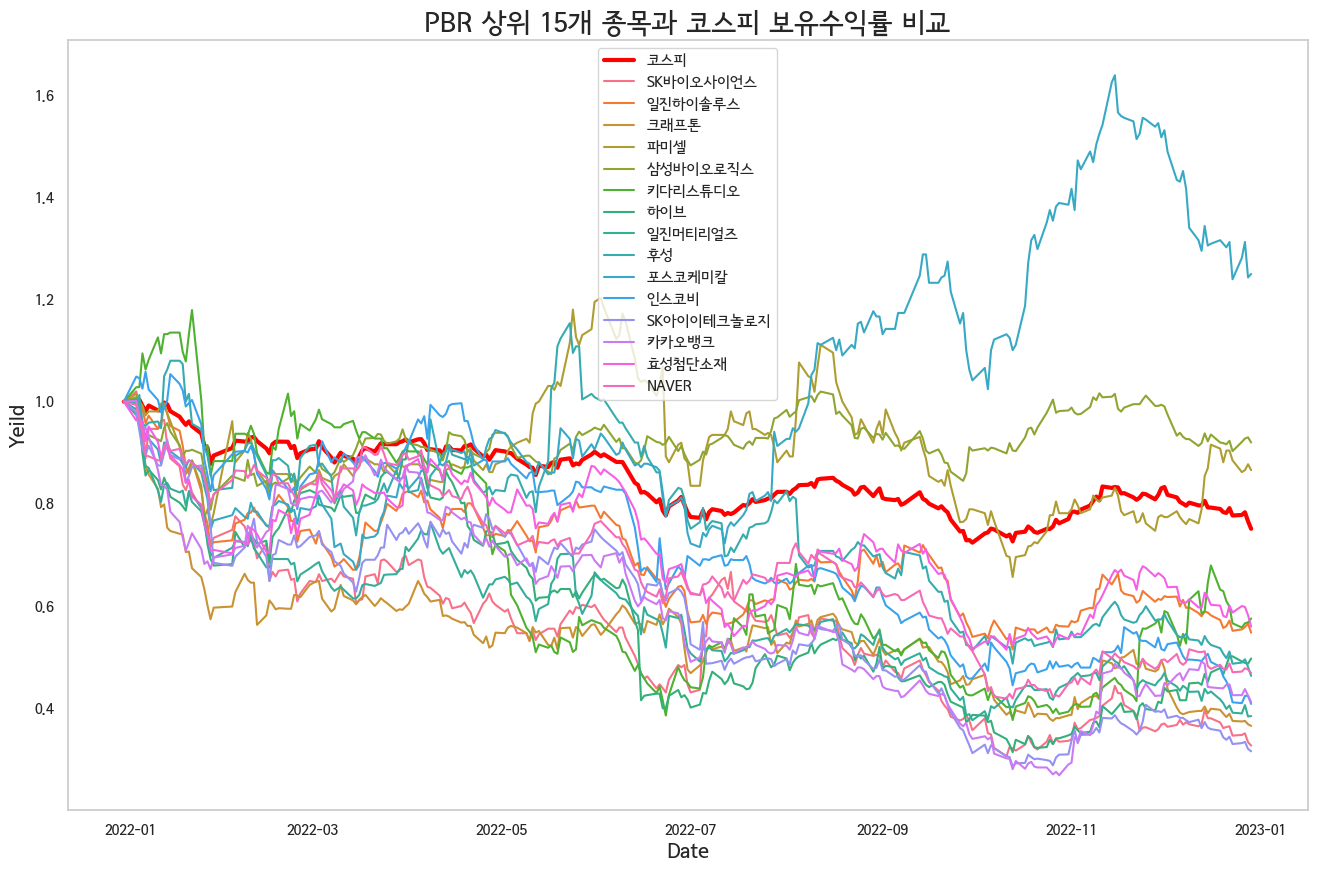

In [37]:
# Visualization: PBR 상위 15개 종목과 코스피 보유수익률 비교

mpl.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)

fig = plt.figure( figsize=(16, 10)) # 그래프 크기 조절

ax1 = sns.lineplot(
    data=kospi_yeild,
    x = 'Date',
    y = 'Close',
    label = '코스피',
    color = 'red',
    linewidth = 3
)

ax2 = sns.lineplot(
    data=highpbr_yeild,
    x = 'Date',
    y = 'Close',
    hue = '종목명'
)

plt.legend(loc = 'best')
plt.ylabel('Yeild', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.grid()

plt.title('PBR 상위 15개 종목과 코스피 보유수익률 비교', fontsize=20)
plt.show()


### PER 하위 15개 종목들과 같이, 일부 종목에 있어선 코스피 보유 수익률보다 높은 수익률이 확인되었다.
- 하지만 낮은 수익률을 보이는 종목들이 PER 하위 15개 종목들과 비교하여 훨씬 더 많고
- 주가 하락 비율도 큰 것을 확인할 수 있었다.
- 따라서 PBR 상위 15개 종목들은 종목 선정 기준으로 부적합하다 판단된다.

# #4 코스피 지수의 추이와 암호화폐 시장 지수의 상관성 비교 분석

- 암호화폐와 주식 시장은 비슷해 보이지만 다른 시장이다.
- 이를 한 번 알아보고자 두 데이터를 가져와 관계를 나타내보고자 한다.

## Data 전처리

In [38]:
'''
# kospi 슬라이싱
kospi_short = kospi_df[['종가']]
kospi_short = kospi_short.reset_index(drop=False)
kospi_short.rename(columns={'날짜':'Date', '종가':'Close'}, inplace=True)
kospi_short = kospi_short[kospi_short['Date'] >= '2021-12-30']
'''
kospi_short

Date    Close
5431 2021-12-30  2977.65
5432 2022-01-03  2988.77
5433 2022-01-04  2989.24
5434 2022-01-05  2953.97
5435 2022-01-06  2920.53
...         ...      ...
5673 2022-12-23  2313.69
5674 2022-12-26  2317.14
5675 2022-12-27  2332.79
5676 2022-12-28  2280.45
5677 2022-12-29  2236.40

[247 rows x 2 columns]

In [39]:
import requests
days = 365 # 최근 n일의 데이터 수집 
idx =  'UBMI' # 인덱스명 
url = 'https://crix-api-cdn.upbit.com/v1/crix/candles/days?code=IDX.UPBIT.' + idx + '&count=' + str(days)
response = requests.get(url)
data = requests.get(url).json()
ubmi = pd.DataFrame(data)
ubmi

candleDateTime          candleDateTimeKst  openingPrice  \
0    2023-03-24T00:00:00+00:00  2023-03-24T09:00:00+09:00   6269.504666   
1    2023-03-23T00:00:00+00:00  2023-03-23T09:00:00+09:00   6095.891148   
2    2023-03-22T00:00:00+00:00  2023-03-22T09:00:00+09:00   6274.526570   
3    2023-03-21T00:00:00+00:00  2023-03-21T09:00:00+09:00   6190.447868   
4    2023-03-20T00:00:00+00:00  2023-03-20T09:00:00+09:00   6246.894954   
..                         ...                        ...           ...   
360  2022-03-29T00:00:00+00:00  2022-03-29T09:00:00+09:00  10448.434681   
361  2022-03-28T00:00:00+00:00  2022-03-28T09:00:00+09:00  10284.665820   
362  2022-03-27T00:00:00+00:00  2022-03-27T09:00:00+09:00   9936.407710   
363  2022-03-26T00:00:00+00:00  2022-03-26T09:00:00+09:00   9842.723415   
364  2022-03-25T00:00:00+00:00  2022-03-25T09:00:00+09:00   9770.578027   

        highPrice      lowPrice    tradePrice  candleAccTradeVolume  \
0     6272.551993   6233.371576   6271.513514                   0.0   
1     6332.905085   6020.517129   6263.958150                   0.0   
2     6408.257432   5984.636843   6094.651921                   0.0   
3     6317.725269   6067.372871   6272.271451                   0.0   
4     6309.080324   6092.255872   6189.912023                   0.0   
..            ...           ...           ...                   ...   
360  10748.332091  10399.688192  10545.320452                   0.0   
361  10656.138584  10252.649133  10453.502999                   0.0   
362  10313.734193   9859.895768  10282.748079                   0.0   
363   9951.154812   9767.406370   9929.698856                   0.0   
364  10002.939649   9699.489056   9845.735565                   0.0   

     candleAccTradePrice      timestamp            code  prevClosingPrice  \
0                    0.0  1679621802092  IDX.UPBIT.UBMI       6263.958150   
1                    0.0  1679616011880  IDX.UPBIT.UBMI       6094.651921   
2                    0.0  1679529612297  IDX.UPBIT.UBMI       6272.271451   
3                    0.0  1679443211908  IDX.UPBIT.UBMI       6189.912023   
4                    0.0  1679356812585  IDX.UPBIT.UBMI       6237.361644   
..                   ...            ...             ...               ...   
360                  0.0  1648598412937  IDX.UPBIT.UBMI      10453.502999   
361                  0.0  1648512012914  IDX.UPBIT.UBMI      10282.748079   
362                  0.0  1648425612165  IDX.UPBIT.UBMI       9929.698856   
363                  0.0  1648339212248  IDX.UPBIT.UBMI       9845.735565   
364                  0.0  1648252812572  IDX.UPBIT.UBMI       9768.276253   

    change  changePrice  signedChangePrice  changeRate  signedChangeRate  
0     RISE     7.555365           7.555365    0.001206          0.001206  
1     RISE   169.306229         169.306229    0.027779          0.027779  
2     FALL   177.619530        -177.619530    0.028318         -0.028318  
3     RISE    82.359428          82.359428    0.013305          0.013305  
4     FALL    47.449622         -47.449622    0.007607         -0.007607  
..     ...          ...                ...         ...               ...  
360   RISE    91.817453          91.817453    0.008783          0.008783  
361   RISE   170.754920         170.754920    0.016606          0.016606  
362   RISE   353.049223         353.049223    0.035555          0.035555  
363   RISE    83.963291          83.963291    0.008528          0.008528  
364   RISE    77.459312          77.459312    0.007930          0.007930  

[365 rows x 16 columns]

In [40]:
ubmi.drop(['candleDateTimeKst','openingPrice','highPrice','lowPrice','candleAccTradeVolume', 'candleAccTradePrice',
       'timestamp', 'code', 'prevClosingPrice', 'change', 'changePrice',
       'signedChangePrice', 'changeRate', 'signedChangeRate'],axis=1,inplace=True)
ubmi.rename(columns={'candleDateTime':'Date','tradePrice':'Close'},inplace=True)
ubmi.Date = ubmi.Date.apply(lambda x: x.split('T')[0])
ubmi.Date = pd.to_datetime(ubmi.Date)

In [41]:
ubmi = ubmi.sort_values(by = 'Date')
ubmi

Date         Close
364 2022-03-25   9845.735565
363 2022-03-26   9929.698856
362 2022-03-27  10282.748079
361 2022-03-28  10453.502999
360 2022-03-29  10545.320452
..         ...           ...
4   2023-03-20   6189.912023
3   2023-03-21   6272.271451
2   2023-03-22   6094.651921
1   2023-03-23   6263.958150
0   2023-03-24   6271.513514

[365 rows x 2 columns]

## UBMI와 KOSPI 동향 비교 분석

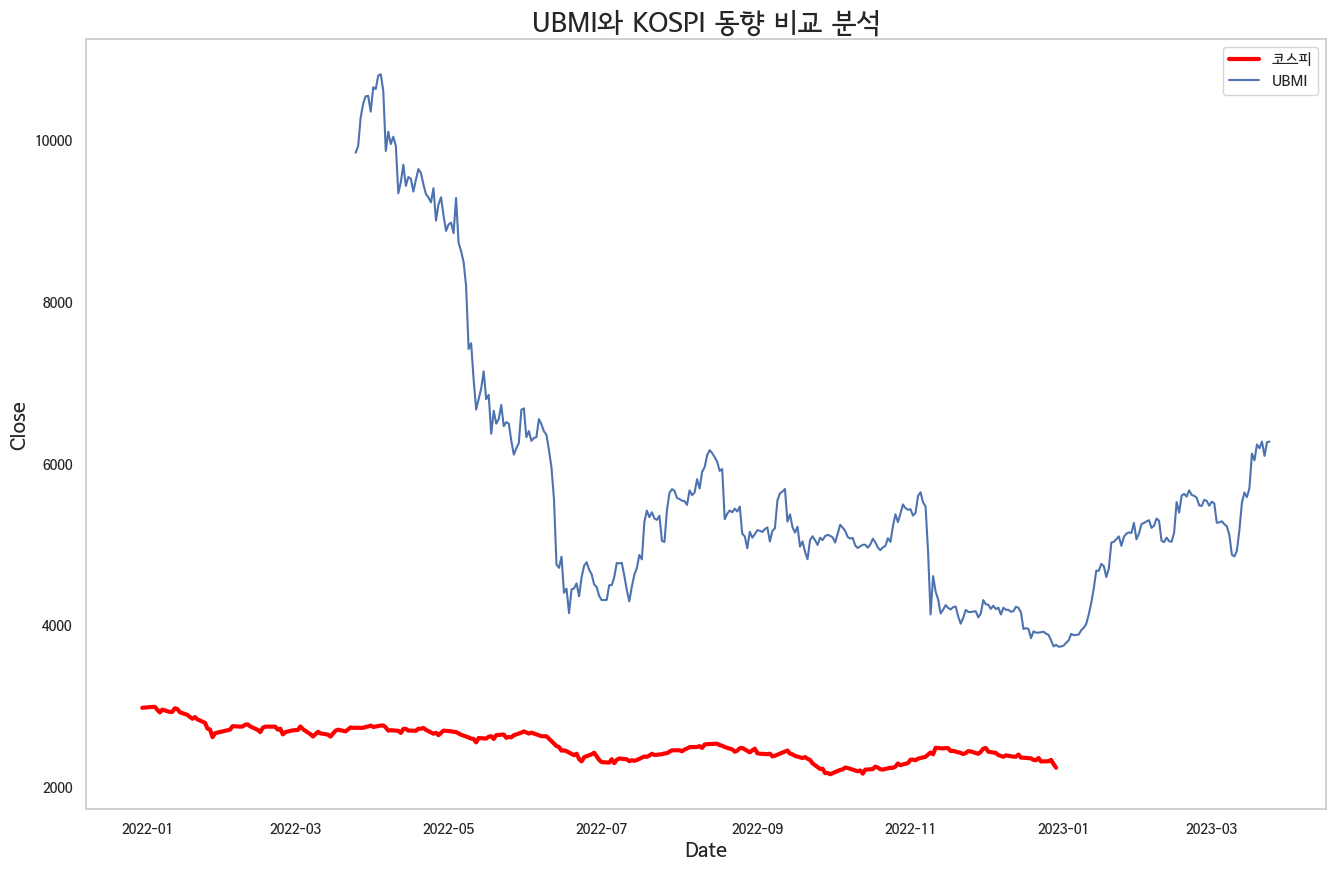

In [42]:
# Visualization: UBMI와 KOSPI 동향 비교 분석

mpl.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)

fig = plt.figure( figsize=(16, 10)) # 그래프 크기 조절

ax1 = sns.lineplot(
    data=kospi_short,
    x = 'Date',
    y = 'Close',
    label = '코스피',
    color = 'red',
    linewidth = 3
)

ax2 = sns.lineplot(
    data=ubmi,
    x = 'Date',
    y = 'Close',
    label = 'UBMI'
)

plt.legend(loc = 'best')
plt.ylabel('Close', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.grid()

plt.title('UBMI와 KOSPI 동향 비교 분석', fontsize=20)
plt.show()

In [43]:
kospi_short = kospi_short.reset_index(drop=True)
ubmi = ubmi.reset_index(drop=True)

In [44]:
scale_ = pd.merge(kospi_short, ubmi, on='Date')
get_normalization(scale_.iloc[:,1:3])

array([[0.95159928, 0.86273785],
       [0.95090358, 0.9485884 ],
       [0.96996902, 0.96155813],
       [0.97936095, 0.96211015],
       [0.99743254, 0.93460996],
       [0.96794819, 0.97728091],
       [0.99784665, 1.        ],
       [1.        , 0.97128357],
       [0.95996422, 0.86589575],
       [0.89508208, 0.89959553],
       [0.90258568, 0.87795518],
       [0.89051034, 0.79202984],
       [0.84688012, 0.8113984 ],
       [0.92925411, 0.84186624],
       [0.92961853, 0.80490727],
       [0.89541336, 0.82031711],
       [0.89069255, 0.81561271],
       [0.93322953, 0.83432079],
       [0.93289825, 0.82745202],
       [0.94866741, 0.80738714],
       [0.90974143, 0.79047267],
       [0.83092876, 0.80087329],
       [0.84944758, 0.74426077],
       [0.80099717, 0.77259182],
       [0.84808931, 0.78499598],
       [0.89374037, 0.75337336],
       [0.88115155, 0.74070405],
       [0.86957314, 0.72234361],
       [0.86478607, 0.7837884 ],
       [0.81002468, 0.69084077],
       [0.

In [45]:
scale_['Normalization_x'] = np.array(get_normalization(scale_.iloc[:,1:3]))[:,0]
scale_['Normalization_y'] = np.array(get_normalization(scale_.iloc[:,1:3]))[:,1]

## UBMI와 KOSPI 동향 비교 분석 (정규화)

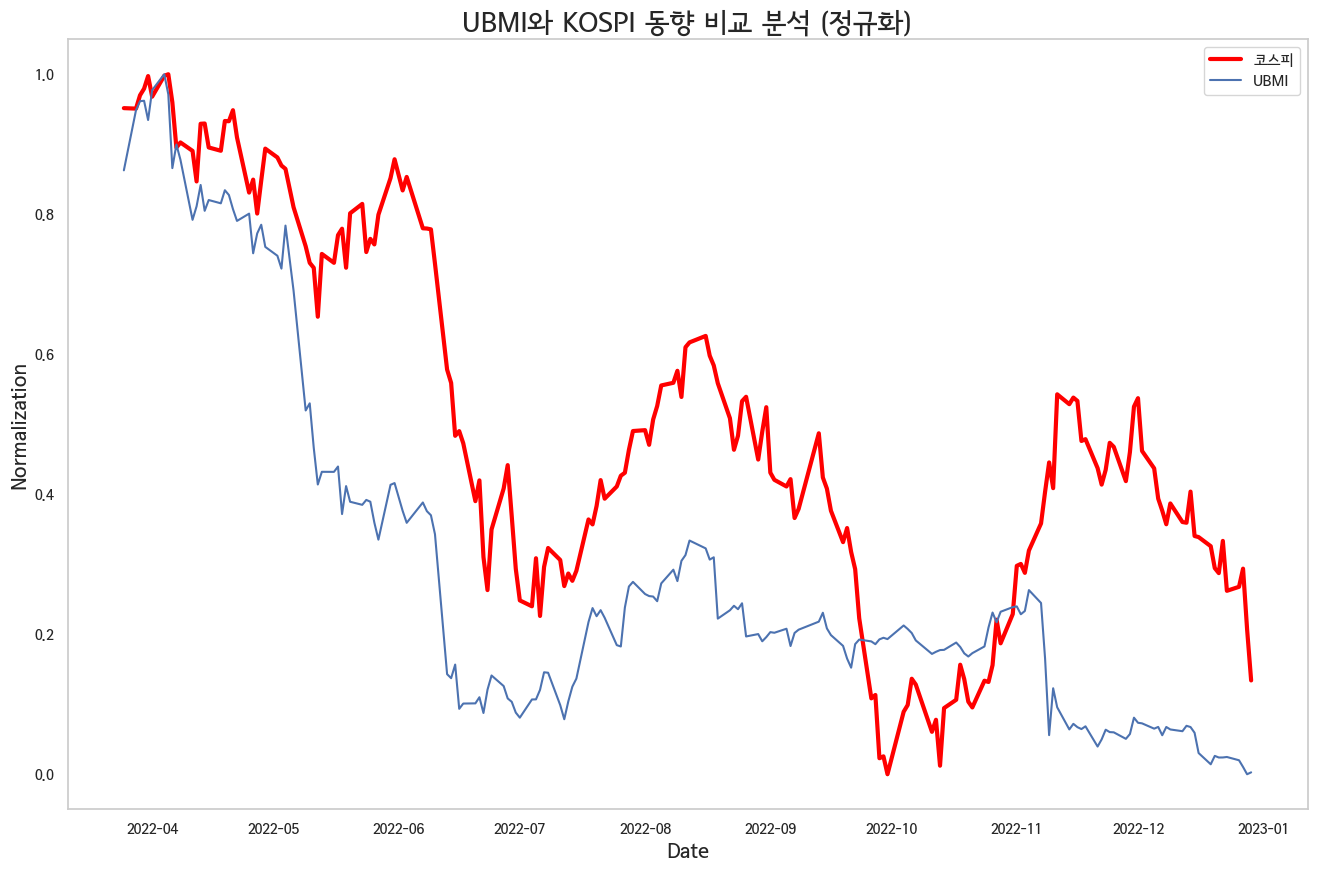

In [46]:
#Visualization: UBMI와 KOSPI 동향 비교 분석 (정규화)

mpl.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)

fig = plt.figure( figsize=(16, 10)) # 그래프 크기 조절

ax1 = sns.lineplot(
    data=scale_,
    x = 'Date',
    y = 'Normalization_x',
    label = '코스피',
    color = 'red',
    linewidth = 3
)

ax2 = sns.lineplot(
    data=scale_,
    x = 'Date',
    y = 'Normalization_y',
    label = 'UBMI'
)

plt.legend(loc = 'best')
plt.ylabel('Normalization', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.grid()

plt.title('UBMI와 KOSPI 동향 비교 분석 (정규화)', fontsize=20)
plt.show()

### 코스피 지수와 UBMI 지수 비교
- 처음에 코스피 지수와 UBMI 지수 값 자체로 비교해서 보려고 했지만 코스피 지수의 변동의 폭이 눈에 띄지 않아 정규화를 해서 그래프로 나타내보았다.
- 그 결과 약간의 유의미한 차이는 있지만 전체적으로 보았을 때 비슷한 움직임을 나타내는 것으로 판단된다.

# 우상욱

# #5 코스피/금/석유/국내 그림 추이 비교

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


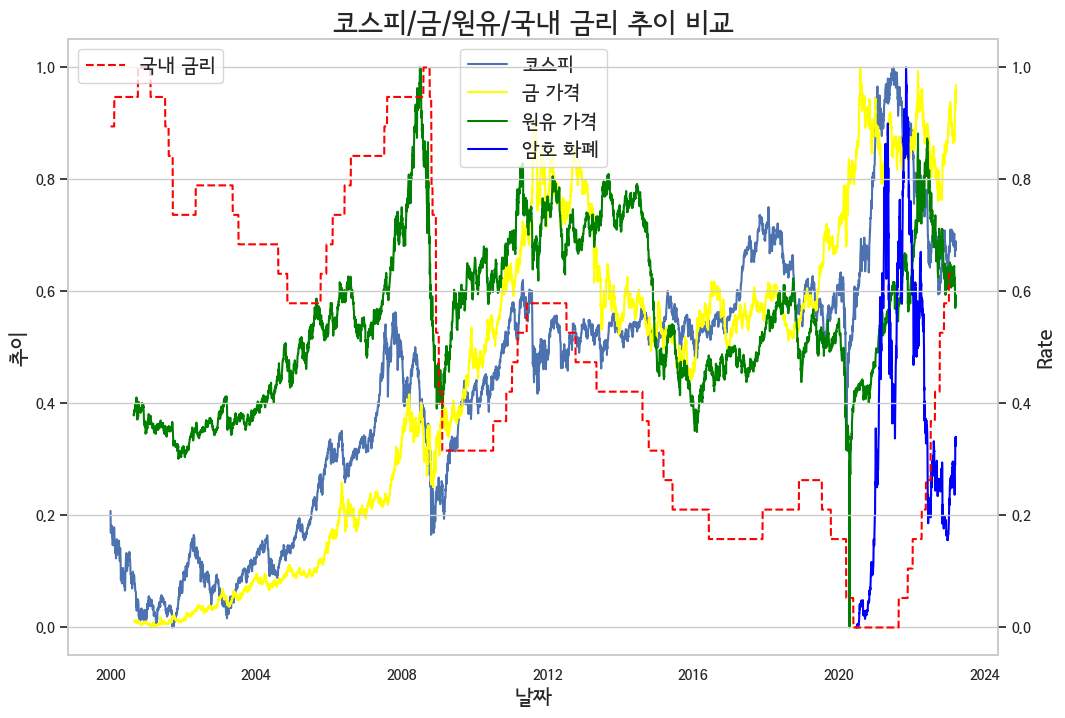

In [47]:
# Visualization: 코스피/금/석유/국내 그림 추이 비교

mpl.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)

# 날짜 설정
now = datetime.now()
start_day = datetime(2000,1,1)
end_day = datetime(now.year,now.month,now.day)

# 코스피 데이터, 금 시세, 석유 시세
kospi_df = stock.get_index_fundamental(start_day.strftime('%Y%m%d'), end_day.strftime('%Y%m%d'), "1001") # 코스피
gold_df  = pdr.get_data_yahoo('GC=F', start_day, end_day) # 금
oil_df = pdr.get_data_yahoo('CL=F', start_day, end_day) # 석유

# 한국 이자율
kr_base_rate_df = pd.read_csv('./data/한국은행 기준금리.csv').T
# 비트코인
upbit_price = upbit_api()

# 전처리
kospi_price = kospi_df['종가'].reset_index().rename(columns = {'날짜' : 'Date', '종가' : 'Close'})
gold_price = gold_df['Close'].reset_index()
oil_price = oil_df['Close'].reset_index()
kr_base_rate = kr_base_rate_df.iloc[4:].reset_index().rename(columns = {'index' : 'Date', 0 : 'Rate'})
kr_base_rate['Date'] = pd.to_datetime(kr_base_rate['Date'])

# 정규화
kospi_price['Close'] = normalize(kospi_price, 'Close')
gold_price['Close'] = normalize(gold_price, 'Close')
oil_price['Close'] = normalize(oil_price, 'Close')
upbit_price['Close'] = normalize(upbit_price, 'Close')
kr_base_rate['Rate'] = normalize(kr_base_rate, 'Rate')

# 시각화

fig = plt.figure(figsize = (12, 8))

ax1 = sns.lineplot(
    data= kospi_price,
    x = 'Date',
    y = 'Close',
    label = '코스피'
)

ax1 = sns.lineplot(
    data= gold_price,
    x = 'Date',
    y = 'Close',
    label = '금 가격',
    color = 'yellow'
)

ax1 = sns.lineplot(
    data= oil_price,
    x = 'Date',
    y = 'Close',
    color = 'green',
    label = '원유 가격',
)

ax1 = sns.lineplot(
    data= upbit_price,
    x = 'Date',
    y = 'Close',
    color = 'blue',
    label = '암호 화폐'
)


plt.title('코스피/금/원유/국내 금리 추이 비교', fontdict = {'fontsize' : 20})
plt.legend(loc = 'upper center', fontsize = 14)
plt.ylabel('추이', fontsize= 15)
plt.xlabel('날짜', fontsize= 15)
plt.grid() # 배경선 표시

ax2 = ax1.twinx() # x축 공유
ax2 = sns.lineplot(
    data = kr_base_rate,
    y = 'Rate',
    x = 'Date',
    color = 'red',
    linestyle='--')
plt.legend(['국내 금리'], loc = 'upper left', fontsize = 14)
plt.ylabel('Rate', fontsize = 15)
plt.show()


# #6 산업군별 주가 상관계수


<AxesSubplot:title={'center':'산업군별 주가 상관계수'}>

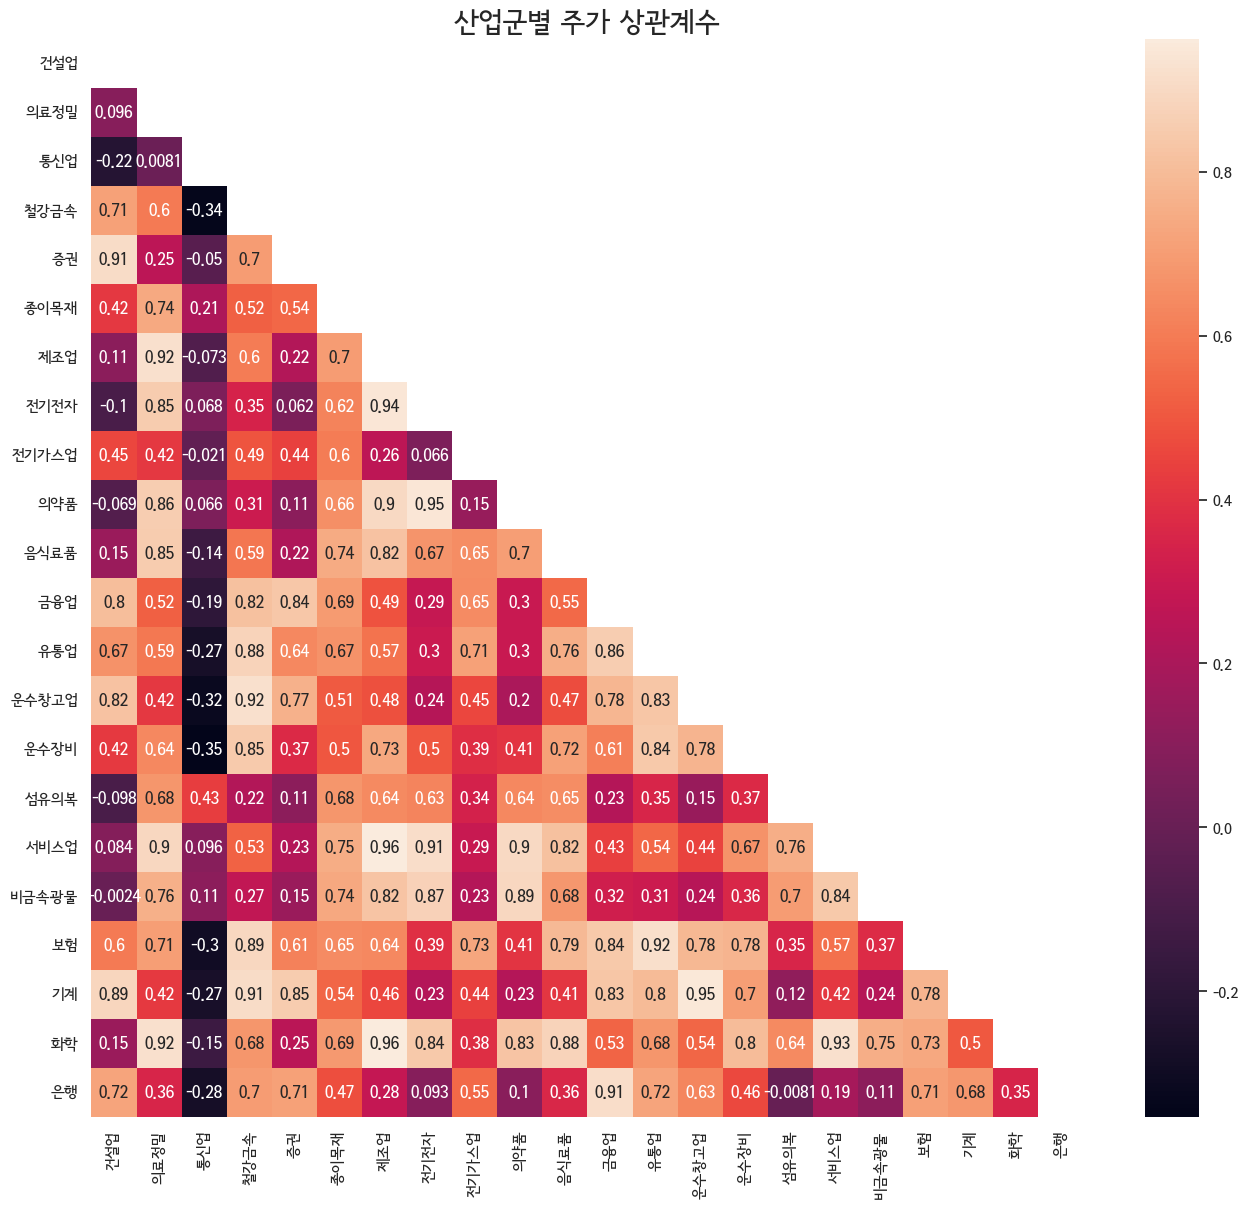

In [48]:
# Visualization: 산업군별 주가 상관계수

mpl.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)

# 산업별 데이터 만들기
df = pd.DataFrame([])
df_sector = pd.read_csv('./data/섹터별_20000101_20220901.csv',encoding='cp949').drop(columns='Unnamed: 0')
df_sector = df_sector.sort_values(by = ['sector_name','date'])[['date','close','sector_name']].reset_index(drop = True)
df['date'] = df_sector['date'].drop_duplicates()
for k,v in df_sector['sector_name'].value_counts().items():
    if k != '코스피':
        df[k] = df_sector.loc[df_sector['sector_name'] == k, 'close'].reset_index(drop = True)

# 시각화
plt.figure(figsize = (16,14))
plt.title('산업군별 주가 상관계수', fontdict = {'fontsize' : 20})
mask = np.triu(np.ones_like(df.set_index('date').corr()))
sns.heatmap(df.set_index('date').corr(), annot = True, mask = mask)

# #7 종토방 크롤링 하기

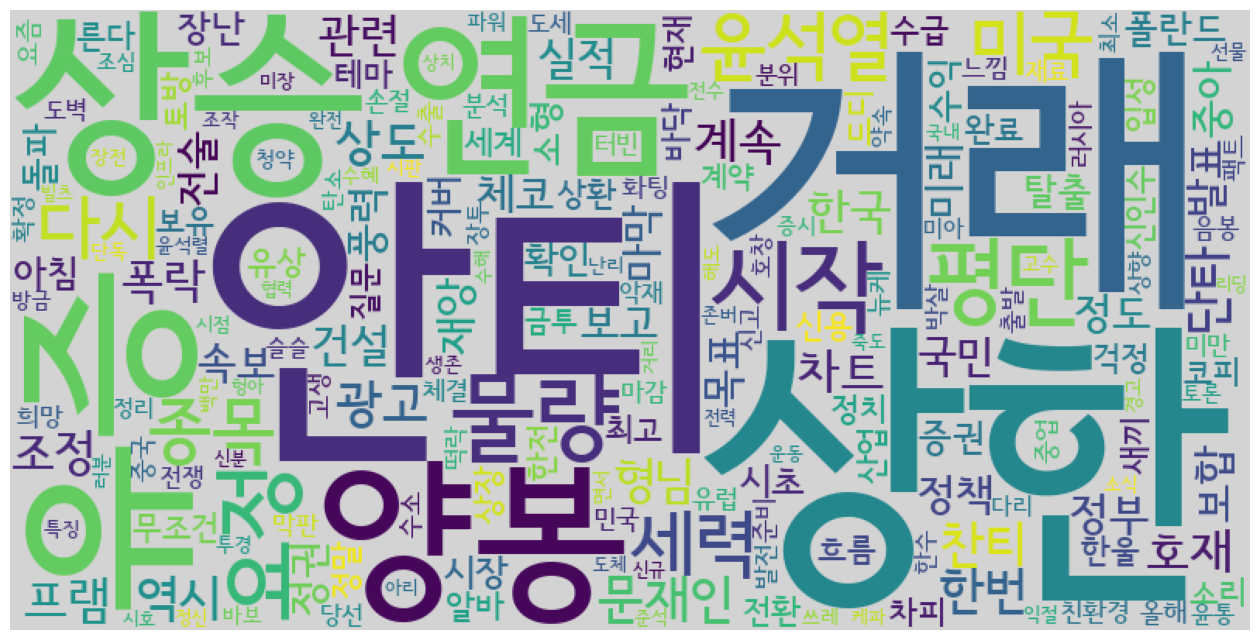

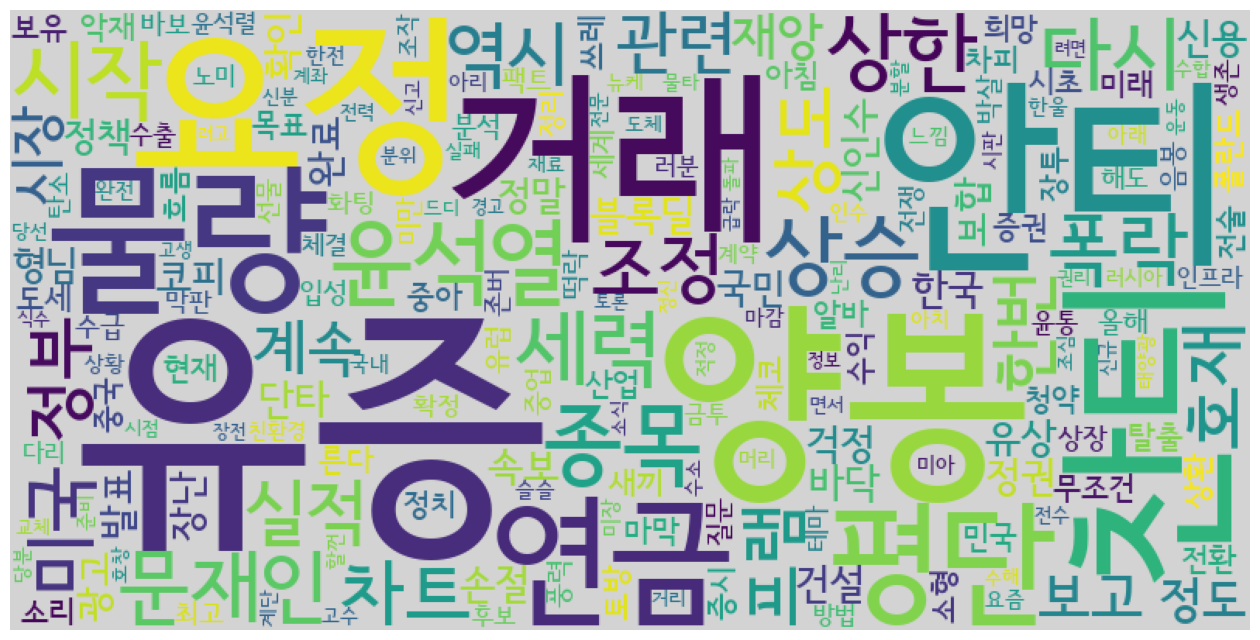

In [51]:
# 크롤링 데이터 불러오기
result_df = pd.read_csv('naver_ds_2023-02-02.csv')
# 크롤링 데이터 날짜 기준으로 새로운 매핑 전용 컬럼 생성
result_df['mapping'] = pd.to_datetime(pd.to_datetime(result_df['날짜']).dt.strftime('%Y-%m-%d'))

# 특정 종목 데이터 불러와서, 등락률에 따라 데이터 분류
df = stock.get_market_ohlcv_by_date(fromdate= result_df.loc[len(result_df) - 1, 'mapping'].strftime(('%Y%m%d')), todate=result_df.loc[0, 'mapping'].strftime(('%Y%m%d')), ticker="034020")
up = df[df['등락률'] >= 0].index # 오른날 혹은 그대로인 날
down = df[df['등락률'] < 0].index # 떨어진날

# 오른날 / 떨어진 날로 데이터 분류
up_result = result_df[result_df['mapping'].isin(up)].reset_index(drop = True)
down_result = result_df[result_df['mapping'].isin(down)].reset_index(drop = True)

# 오른날 기준으로 word_cloud 시각화
word_cloud_jtb(up_result)

# 떨어진 날 기준으로 word_cloud 시각화
word_cloud_jtb(down_result)

# 이병호

# #8 코스피 이동평균선

## 일수별 코스피 이동 평균선

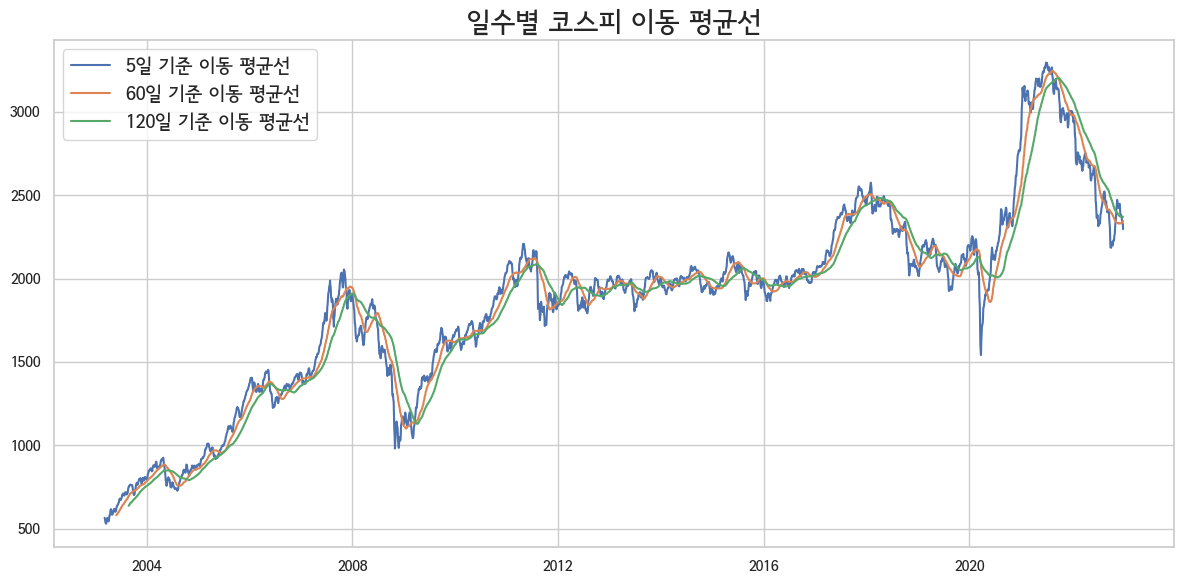

In [52]:
# Visualization: 일수별 코스피 이동 평균선

''' 데이터 불러오기 '''
# # ticker명 찾기
# tmp = []
# for ticker in stock.get_index_ticker_list():
#     tmp.append([ticker, stock.get_index_ticker_name(ticker)])
kospi = []
for i in ['1001','1002', '1003', '1004']:
    kospi.append(stock.get_index_ohlcv("20030301", "20230101", i))
total = kospi
''''''
''' 시각화 시작 '''
mpl.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)

fig = plt.figure(figsize=(12, 6))
# 5일 기준 이동 평균선
sixty_ma = []
for ksp in kospi:
    sixty_ma.append(ksp['종가'].rolling(window=5).mean())
total, big, middle, small = sixty_ma
plt.plot(total,label='5일 기준 이동 평균선')
# 60일 기준 이동 평균선
sixty_ma = []
for ksp in kospi:
    sixty_ma.append(ksp['종가'].rolling(window=60).mean())
total, big, middle, small = sixty_ma
plt.plot(total, label='60일 기준 이동 평균선')
# 120일 기준 이동 평균선
sixty_ma = []
for ksp in kospi:
    sixty_ma.append(ksp['종가'].rolling(window=120).mean())
total, big, middle, small = sixty_ma
plt.plot(total,label='120일 기준 이동 평균선')
# # 240일 기준 이동 평균선
# sixty_ma = []
# for ksp in kospi:
#     sixty_ma.append(ksp['종가'].rolling(window=240).mean())
# total, big, middle, small = sixty_ma
# plt.plot(total, label='240일 기준 이동 평균선')
# # 360일 기준 이동 평균선
# sixty_ma = []
# for ksp in kospi:
#     sixty_ma.append(ksp['종가'].rolling(window=360).mean())
# total, big, middle, small = sixty_ma
# plt.plot(total, label='360일 기준 이동 평균선')
plt.legend(loc = 'upper left', fontsize = 14)
plt.title('일수별 코스피 이동 평균선', fontdict = {'fontsize' : 20})
plt.grid(True)
plt.tight_layout()
plt.show()

## 최근 5년간 코스피 이동 평균선

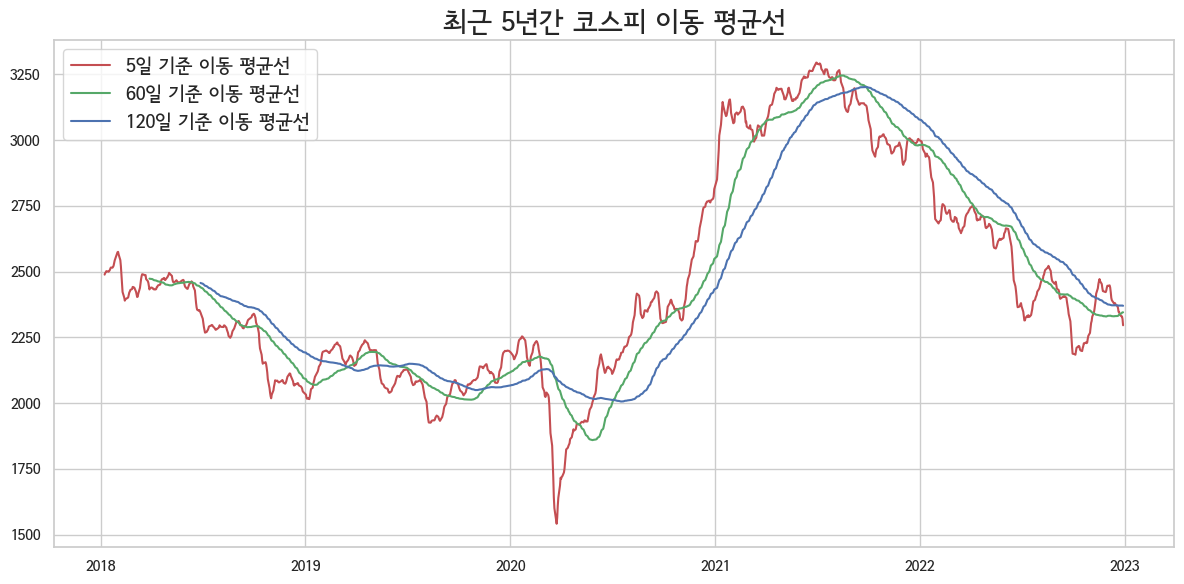

In [53]:
# Visualization: 최근 5년간 코스피 이동 평균선


''' 데이터 불러오기 '''
# # ticker명 찾기
# tmp = []
# for ticker in stock.get_index_ticker_list():
#     tmp.append([ticker, stock.get_index_ticker_name(ticker)])
kospi = []
for i in ['1001','1002', '1003', '1004']:
    kospi.append(stock.get_index_ohlcv("20180101", "20230101", i))
total = kospi
''''''
''' 시각화 시작 '''

mpl.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)

fig = plt.figure(figsize=(12, 6))
# 5일 기준 이동 평균선
sixty_ma = []
for ksp in kospi:
    sixty_ma.append(ksp['종가'].rolling(window=5).mean())
total, big, middle, small = sixty_ma
plt.plot(total, 'r',label='5일 기준 이동 평균선')
# 60일 기준 이동 평균선
sixty_ma = []
for ksp in kospi:
    sixty_ma.append(ksp['종가'].rolling(window=60).mean())
total, big, middle, small = sixty_ma
plt.plot(total, 'g',label='60일 기준 이동 평균선')
# 120일 기준 이동 평균선
sixty_ma = []
for ksp in kospi:
    sixty_ma.append(ksp['종가'].rolling(window=120).mean())
total, big, middle, small = sixty_ma
plt.plot(total, label='120일 기준 이동 평균선')
# # 240일 기준 이동 평균선
# sixty_ma = []
# for ksp in kospi:
#     sixty_ma.append(ksp['종가'].rolling(window=240).mean())
# total, big, middle, small = sixty_ma
# plt.plot(total, label='240일 기준 이동 평균선')
# # 360일 기준 이동 평균선
# sixty_ma = []
# for ksp in kospi:
#     sixty_ma.append(ksp['종가'].rolling(window=360).mean())
# total, big, middle, small = sixty_ma
# plt.plot(total, label='360일 기준 이동 평균선')
plt.legend(loc = 'upper left', fontsize = 14)
plt.title('최근 5년간 코스피 이동 평균선', fontdict = {'fontsize' : 20})
plt.grid(True)
plt.tight_layout()
plt.show()

# 서영호

## Data 전처리

In [58]:
# 데이터
# 연도별
df_sector_year = pd.read_csv(
    './data/섹터별_연별_20000101_20220901.csv', encoding='cp949').drop(columns='Unnamed: 0') 

# 섹터별
df = pd.read_csv('./data/섹터별_20000101_20220901.csv',
                 encoding='cp949').drop(columns='Unnamed: 0') 

# 코스피 분류별
df_200 = pd.read_csv('./data/코스피200대분류별_20000101_20220901.csv',
                     encoding='cp949').drop(columns='Unnamed: 0')


In [59]:
# 코스피 200 직접 불러오기
df_kospi_200 = stock.get_index_ohlcv("20181022", "20220901", "1028").reset_index()
temp = df_kospi_200.reset_index()
temp['sector_name'] = stock.get_index_ticker_name('1028')
temp['sector_ticker'] = '1028'
df_kospi_200 = temp[['sector_ticker','sector_name','날짜','시가','종가','고가','저가','거래량','거래대금',
                     '상장시가총액']]

# 칼럼명 영어로 변환
df_kospi_200.columns = ['sector_ticker','sector_name','date','open','close','high','low','volume','volume($)',
                     'Market_Cap']

# 날짜 타입 설정
df['date'] = df['date'].astype("datetime64")
df_200['date'] = df_200['date'].astype("datetime64")
df_kospi_200['date'] = df_kospi_200['date'].astype("datetime64")
df_sector_year['date'] = df_sector_year['date'].astype("datetime64")

In [60]:
# df 섹터별 구분하여 DF 생성
코스피 = df[df['sector_name']=='코스피']
음식료품 = df[df['sector_name']=='음식료품']
섬유의복 = df[df['sector_name']=='섬유의복']
종이목재 = df[df['sector_name']=='종이목재']
화학 = df[df['sector_name']=='화학']
의약품 = df[df['sector_name']=='의약품']
비금속광물 = df[df['sector_name']=='비금속광물']
철강금속 = df[df['sector_name']=='철강금속']
기계 = df[df['sector_name']=='기계']
전기전자 = df[df['sector_name']=='전기전자']
의료정밀 = df[df['sector_name']=='의료정밀']
운수장비 = df[df['sector_name']=='운수장비']
유통업 = df[df['sector_name']=='유통업']
전기가스업 = df[df['sector_name']=='전기가스업']
건설업 = df[df['sector_name']=='건설업']
운수창고업 = df[df['sector_name']=='운수창고업']
건설업 = df[df['sector_name']=='건설업']
통신업 = df[df['sector_name']=='통신업']
금융업 = df[df['sector_name']=='금융업']
은행 = df[df['sector_name']=='은행']
증권 = df[df['sector_name']=='증권']
보험 = df[df['sector_name']=='보험']
서비스업 = df[df['sector_name']=='서비스업']
제조업 = df[df['sector_name']=='제조업']

In [61]:
# 칼럼명 리스트 선언
sector_list=['코스피', '음식료품', '섬유의복', '종이목재', '화학', '의약품', '비금속광물', '철강금속', '기계',
       '전기전자', '의료정밀', '운수장비', '유통업', '전기가스업', '건설업', '운수창고업', '통신업',
       '금융업', '은행', '증권', '보험', '서비스업', '제조업']

x_list = [코스피, 음식료품, 섬유의복, 종이목재, 화학, 의약품, 비금속광물, 철강금속, 기계,
       전기전자, 의료정밀, 운수장비, 유통업, 전기가스업, 건설업, 운수창고업, 통신업,
       금융업, 은행, 증권, 보험, 서비스업, 제조업]

time_list = [df_sector_year]

In [62]:
# df_200 섹터별 구분하여 DF 생성
커뮤니케이션서비스200 = df_200[df_200['sector_name']=='코스피 200 커뮤니케이션서비스']
건설200 = df_200[df_200['sector_name']=='코스피 200 건설']
중공업200 = df_200[df_200['sector_name']=='코스피 200 중공업']
철강소재200 = df_200[df_200['sector_name']=='코스피 200 철강/소재']
에너지화학200 = df_200[df_200['sector_name']=='코스피 200 에너지/화학']
정보기술200 = df_200[df_200['sector_name']=='코스피 200 정보기술']
금융200 = df_200[df_200['sector_name']=='코스피 200 금융']
생활소비재200 = df_200[df_200['sector_name']=='코스피 200 생활소비재']
경기소비재200 = df_200[df_200['sector_name']=='코스피 200 경기소비재']
산업재200 = df_200[df_200['sector_name']=='코스피 200 산업재']
헬스케어200 = df_200[df_200['sector_name']=='코스피 200 헬스케어']

In [63]:
# 섹터별 구분하여 DF 생성
df_name_list=[]
for i in range(len(time_list)):
    for j in range(len(sector_list)):
        df_name_list.append(time_list[i][time_list[i]['sector_name']==sector_list[j]])

In [64]:
# 섹터별 분리
df_sector_코스피=df_name_list[0]
df_sector_음식료품=df_name_list[1] 
df_sector_섬유의복=df_name_list[2] 
df_sector_종이목재=df_name_list[3] 
df_sector_화학=df_name_list[4] 
df_sector_의약품=df_name_list[5] 
df_sector_비금속광물=df_name_list[6]
df_sector_철강금속=df_name_list[7] 
df_sector_기계=df_name_list[8] 
df_sector_전기전자=df_name_list[9] 
df_sector_의료정밀=df_name_list[10]
df_sector_운수장비=df_name_list[11] 
df_sector_유통업=df_name_list[12] 
df_sector_전기가스업=df_name_list[13] 
df_sector_건설업=df_name_list[14] 
df_sector_운수창고업=df_name_list[15] 
df_sector_통신업=df_name_list[16]
df_sector_금융업=df_name_list[17] 
df_sector_은행=df_name_list[18] 
df_sector_증권=df_name_list[19] 
df_sector_보험=df_name_list[20] 
df_sector_서비스업=df_name_list[21] 
df_sector_제조업=df_name_list[22]

In [65]:
df_sector_코스피

date     Open     High      Low    Close        Volume  \
0   2003-12-31   578.50   824.26   512.30   810.71  109666469113   
23  2004-12-31   816.26   939.52   713.99   895.92   92850770285   
46  2005-12-31   896.00  1383.14   866.17  1379.37  116439734090   
69  2006-12-31  1383.32  1464.70  1192.09  1434.46   68936782766   
92  2007-12-31  1438.89  2085.45  1345.08  1897.13   89506074528   
115 2008-12-31  1891.45  1901.13   892.16  1124.47   88149063223   
138 2009-12-31  1132.87  1723.17   992.69  1682.77  122871286203   
161 2010-12-31  1681.71  2052.97  1532.68  2051.00   95595708006   
184 2011-12-31  2063.69  2231.47  1644.11  1825.74   87732413177   
207 2012-12-31  1831.69  2057.28  1758.99  1997.05  120646923380   
230 2013-12-31  2013.74  2063.28  1770.53  2011.34   81096386463   
253 2014-12-31  2013.11  2093.08  1881.73  1915.59   68130089442   
276 2015-12-31  1914.24  2189.54  1800.75  1961.31  112903398973   
299 2016-12-31  1954.47  2073.89  1817.97  2026.46   92686041092   
322 2017-12-31  2022.23  2561.63  2015.68  2467.49   82731042375   
345 2018-12-31  2474.86  2607.10  1985.95  2041.04   97105193258   
368 2019-12-31  2050.55  2252.05  1891.81  2197.67  115797793783   
391 2020-12-31  2201.21  2878.21  1439.43  2873.47  222023578711   
414 2021-12-31  2874.50  3316.08  2822.73  2977.65  257790857623   

            Volume($) sector_name  sector_ticker  
0     355362625966515         코스피           1001  
23    412588138748165         코스피           1001  
46    655074594730170         코스피           1001  
69    704587507977345         코스피           1001  
92    951904852427970         코스피           1001  
115   576927703499465         코스피           1001  
138   887935182728775         코스피           1001  
161  1141885458029375         코스피           1001  
184  1041999162203131         코스피           1001  
207  1154294166644442         코스피           1001  
230  1185973723790511         코스피           1001  
253  1192252867277006         코스피           1001  
276  1242832089300653         코스피           1001  
299  1308440373892236         코스피           1001  
322  1605820911910270         코스피           1001  
345  1343971857985694         코스피           1001  
368  1475909365805673         코스피           1001  
391  1980543161609061         코스피           1001  
414  2203366545861792         코스피           1001

In [66]:
# 섹터별 코스피 지수 =  코스피지수 작성 기준시점은 1980년 1월 4일. 
# 이 날 유가증권시장에 상장된 보통주 전 종목의 시가총액을 100으로 놓았을 때 오늘 현재 시가총액이 얼마나 되는지를 다음 식을 따라 구하면, 오늘의 코스피지수 값이 나온다
df_sector_year_코스피_index = (df_sector_코스피['Close'] / df_sector_코스피['Close'].iloc[0]) * 100
df_sector_year_음식료품_index = (df_sector_음식료품['Close'] / df_sector_음식료품['Close'].iloc[0]) * 100
df_sector_year_섬유의복_index = (df_sector_섬유의복['Close'] / df_sector_섬유의복['Close'].iloc[0]) * 100
df_sector_year_종이목재_index = (df_sector_종이목재['Close'] / df_sector_종이목재['Close'].iloc[0]) * 100
df_sector_year_화학_index = (df_sector_화학['Close'] / df_sector_화학['Close'].iloc[0]) * 100
df_sector_year_의약품_index = (df_sector_의약품['Close'] / df_sector_의약품['Close'].iloc[0]) * 100
df_sector_year_비금속광물_index = (df_sector_비금속광물['Close'] / df_sector_비금속광물['Close'].iloc[0]) * 100
df_sector_year_철강금속_index = (df_sector_철강금속['Close'] / df_sector_철강금속['Close'].iloc[0]) * 100
df_sector_year_기계_index = (df_sector_기계['Close'] / df_sector_기계['Close'].iloc[0]) * 100
df_sector_year_전기전자_index = (df_sector_전기전자['Close'] / df_sector_전기전자['Close'].iloc[0]) * 100
df_sector_year_의료정밀_index = (df_sector_의료정밀['Close'] / df_sector_의료정밀['Close'].iloc[0]) * 100
df_sector_year_운수장비_index = (df_sector_운수장비['Close'] / df_sector_운수장비['Close'].iloc[0]) * 100
df_sector_year_유통업_index = (df_sector_유통업['Close'] / df_sector_유통업['Close'].iloc[0]) * 100
df_sector_year_전기가스업_index = (df_sector_전기가스업['Close'] / df_sector_전기가스업['Close'].iloc[0]) * 100
df_sector_year_건설업_index = (df_sector_건설업['Close'] / df_sector_건설업['Close'].iloc[0]) * 100
df_sector_year_운수창고업_index = (df_sector_운수창고업['Close'] / df_sector_운수창고업['Close'].iloc[0]) * 100
df_sector_year_통신업_index = (df_sector_통신업['Close'] / df_sector_통신업['Close'].iloc[0]) * 100
df_sector_year_금융업_index = (df_sector_금융업['Close'] / df_sector_금융업['Close'].iloc[0]) * 100
df_sector_year_은행_index = (df_sector_은행['Close'] / df_sector_은행['Close'].iloc[0]) * 100
df_sector_year_증권_index = (df_sector_증권['Close'] / df_sector_증권['Close'].iloc[0]) * 100
df_sector_year_보험_index = (df_sector_보험['Close'] / df_sector_보험['Close'].iloc[0]) * 100
df_sector_year_서비스업_index = (df_sector_서비스업['Close'] / df_sector_서비스업['Close'].iloc[0]) * 100
df_sector_year_제조업_index = (df_sector_제조업['Close'] / df_sector_제조업['Close'].iloc[0]) * 100


In [67]:
# 전처리
산업 = df[df['date']=='2022-01-26'][1:]
전체_산업_시총 = 산업['Market_Cap'].sum()
sector_name_list = 산업['sector_name'].unique()
각_산업_시총_비중 = {}

for sec in sector_name_list:
    tmp = (산업[산업['sector_name']==sec]['Market_Cap']).item()
    각_산업_시총_비중[sec] = tmp/전체_산업_시총*100
    
각_산업_시총_비중 = pd.DataFrame(list(각_산업_시총_비중.items()),
                   columns=['산업','비중'])
각_산업_시총_비중 = 각_산업_시총_비중.sort_values(by='비중',ascending=False)
ratio = 각_산업_시총_비중['비중']
labels = 각_산업_시총_비중['산업']

In [68]:
sector_list=['코스피', '음식료품', '섬유의복', '종이목재', '화학', '의약품', '비금속광물', '철강금속', '기계',
       '전기전자', '의료정밀', '운수장비', '유통업', '전기가스업', '건설업', '운수창고업', '통신업',
       '금융업', '은행', '증권', '보험', '서비스업', '제조업']

x_list = [코스피, 음식료품, 섬유의복, 종이목재, 화학, 의약품, 비금속광물, 철강금속, 기계,
       전기전자, 의료정밀, 운수장비, 유통업, 전기가스업, 건설업, 운수창고업, 통신업,
       금융업, 은행, 증권, 보험, 서비스업, 제조업]

# 베타 구하기
beta = []
for x in x_list:
    beta.append(get_beta(코스피,x,'2022-01-01','2022-09-01'))

tmp={}
for i in range(len(x_list)):
    tmp[sector_list[i]] = beta[i]
    
tmp = pd.DataFrame(list(tmp.items()),
                   columns=['sector_list','beta'])
beta = tmp.sort_values(by='beta',ascending=False)
beta = beta.reset_index().drop('index',axis=1)
beta = beta.fillna(0)

In [69]:
corr = {}
x = x_list[0]
for j in range(len(x_list)):
    y = x_list[j]
    corr[sector_list[j]] = get_corr(x,y,'2022-01-01','2022-09-01')
corr = pd.DataFrame(list(corr.items()),columns=['sector_list',sector_list[0]])

for i in range(1,len(x_list)):
    tmp = {}
    x = x_list[i]
    for j in range(len(x_list)):
        y = x_list[j]
        tmp[sector_list[j]] = get_corr(x,y,'2022-01-01','2022-09-01')
    tmp = pd.DataFrame(list(tmp.items()),columns=['sector_list',sector_list[i]])
    corr = pd.merge(corr,tmp)  
corr = corr.set_index('sector_list')

In [70]:
경제섹터 = df_200[df_200['date']=='2022-09-01']
전체_경제섹터_시총 = 경제섹터['Market_Cap'].sum()
경제섹터_list = 경제섹터['sector_name'].unique()
각_경제섹터_시총_비중 = {}

for sec in 경제섹터_list:
    tmp = (경제섹터[경제섹터['sector_name']==sec]['Market_Cap']).item()
    각_경제섹터_시총_비중[sec] = tmp/전체_경제섹터_시총*100
    
각_경제섹터_시총_비중 = pd.DataFrame(list(각_경제섹터_시총_비중.items()),
                   columns=['경제섹터','비중'])
각_경제섹터_시총_비중 = 각_경제섹터_시총_비중.sort_values(by='비중',ascending=False)
ratio_200 = 각_경제섹터_시총_비중['비중']
labels_200 = 각_경제섹터_시총_비중['경제섹터']

In [71]:
sec_200 = [커뮤니케이션서비스200,건설200,중공업200,철강소재200,에너지화학200,정보기술200,금융200,생활소비재200,경기소비재200,산업재200,헬스케어200]
sec_200_name = ['코스피 200 커뮤니케이션서비스', '코스피 200 건설', '코스피 200 중공업', '코스피 200 철강/소재',
       '코스피 200 에너지/화학', '코스피 200 정보기술', '코스피 200 금융', '코스피 200 생활소비재',
       '코스피 200 경기소비재', '코스피 200 산업재', '코스피 200 헬스케어']

sec_200_corr_dict = {}
temp_list = []
for idx, i in enumerate(sec_200):
    for j in sec_200:
        temp_list.append(get_corr(i,j,'2022-01-01','2022-09-01'))
    sec_200_corr_dict[sec_200_name[idx]] = temp_list
    temp_list = []

상관계수_200 = pd.DataFrame(sec_200_corr_dict, index = sec_200_name)
상관계수_200.reset_index().rename(columns={'index':'상대섹터'})

상대섹터  코스피 200 커뮤니케이션서비스  코스피 200 건설  코스피 200 중공업  \
0   코스피 200 커뮤니케이션서비스              1.000       0.484        0.385   
1          코스피 200 건설              0.484       1.000        0.766   
2         코스피 200 중공업              0.385       0.766        1.000   
3       코스피 200 철강/소재              0.464       0.726        0.669   
4      코스피 200 에너지/화학              0.634       0.724        0.677   
5        코스피 200 정보기술              0.725       0.574        0.451   
6          코스피 200 금융              0.525       0.588        0.482   
7       코스피 200 생활소비재              0.556       0.581        0.455   
8       코스피 200 경기소비재              0.565       0.593        0.496   
9         코스피 200 산업재              0.617       0.775        0.738   
10       코스피 200 헬스케어              0.648       0.465        0.381   

    코스피 200 철강/소재  코스피 200 에너지/화학  코스피 200 정보기술  코스피 200 금융  코스피 200 생활소비재  \
0           0.464           0.634         0.725       0.525          0.556   
1           0.726           0.724         0.574       0.588          0.581   
2           0.669           0.677         0.451       0.482          0.455   
3           1.000           0.699         0.557       0.667          0.517   
4           0.699           1.000         0.761       0.613          0.594   
5           0.557           0.761         1.000       0.544          0.593   
6           0.667           0.613         0.544       1.000          0.481   
7           0.517           0.594         0.593       0.481          1.000   
8           0.569           0.645         0.662       0.546          0.643   
9           0.712           0.795         0.666       0.640          0.680   
10          0.402           0.546         0.631       0.368          0.555   

    코스피 200 경기소비재  코스피 200 산업재  코스피 200 헬스케어  
0           0.565        0.617         0.648  
1           0.593        0.775         0.465  
2           0.496        0.738         0.381  
3           0.569        0.712         0.402  
4           0.645        0.795         0.546  
5           0.662        0.666         0.631  
6           0.546        0.640         0.368  
7           0.643        0.680         0.555  
8           1.000        0.646         0.493  
9           0.646        1.000         0.578  
10          0.493        0.578         1.000

In [72]:
sec = [코스피, 음식료품, 섬유의복, 종이목재, 화학, 의약품, 비금속광물, 철강금속, 기계,
       전기전자, 의료정밀, 운수장비, 유통업, 전기가스업, 건설업, 운수창고업, 통신업,
       금융업, 은행, 증권, 보험, 서비스업, 제조업]
sec_name_5 = ['코스피_5', '음식료품_5', '섬유의복_5', '종이목재_5', '화학_5', '의약품_5', '비금속광물_5', '철강금속_5', '기계_5',
       '전기전자_5', '의료정밀_5', '운수장비_5', '유통업_5', '전기가스업_5', '건설업_5', '운수창고업_5', '통신업_5',
       '금융업_5', '은행_5', '증권_5', '보험_5', '서비스업_5', '제조업_5']

sec_5_dict = {}

for idx, name in enumerate(sec):
    sec_5_dict[sec_name_5[idx]] = round(get_mdd_5(name),3)

sec_name_10 = ['코스피_10', '음식료품_10', '섬유의복_10', '종이목재_10', '화학_10', '의약품_10', '비금속광물_10', '철강금속_10', '기계_10',
       '전기전자_10', '의료정밀_10', '운수장비_10', '유통업_10', '전기가스업_10', '건설업_10', '운수창고업_10', '통신업_10',
       '금융업_10', '은행_10', '증권_10', '보험_10', '서비스업_10', '제조업_10']

sec_10_dict = {}

for idx, name in enumerate(sec):
    sec_10_dict[sec_name_10[idx]] = round(get_mdd_10(name),3)

df_mdd_5 = pd.DataFrame(data = sec_5_dict.values(), index = sec_5_dict.keys(), columns = ['MDD_5'])
df_mdd_10 = pd.DataFrame(data = sec_10_dict.values(), index = sec_10_dict.keys(), columns = ['MDD_10'])
df_mdd_5_modified = df_mdd_5 + 44.79
df_mdd_5_modified = df_mdd_5_modified.sort_values(by=['MDD_5'])

sec_200 = [커뮤니케이션서비스200,건설200,중공업200,철강소재200,에너지화학200,정보기술200,금융200,생활소비재200,경기소비재200,산업재200,헬스케어200]
sec_200_name = ['코스피 200 커뮤니케이션서비스', '코스피 200 건설', '코스피 200 중공업', '코스피 200 철강/소재',
       '코스피 200 에너지/화학', '코스피 200 정보기술', '코스피 200 금융', '코스피 200 생활소비재',
       '코스피 200 경기소비재', '코스피 200 산업재', '코스피 200 헬스케어']

sec_200_dict={}
for idx, name in enumerate(sec_200):
    sec_200_dict[sec_200_name[idx]] = round(get_mdd_200(name),3)
sec_200_dict['코스피 200'] = round(get_mdd_200(df_kospi_200),3)
df_mdd_200 = pd.DataFrame(data = sec_200_dict.values(), index = sec_200_dict.keys(), columns = ['MDD_200'])
df_mdd_200_modified = df_mdd_200 + 36.18
df_mdd_200_modified = df_mdd_200_modified.sort_values(by=['MDD_200'])

df_mdd_10_modified = df_mdd_10 + 44.79


# #9 연도별 코스피 기준 섹터별 추이

## 연도별 코스피 기준 서비스업,제조업 섹터별 추이

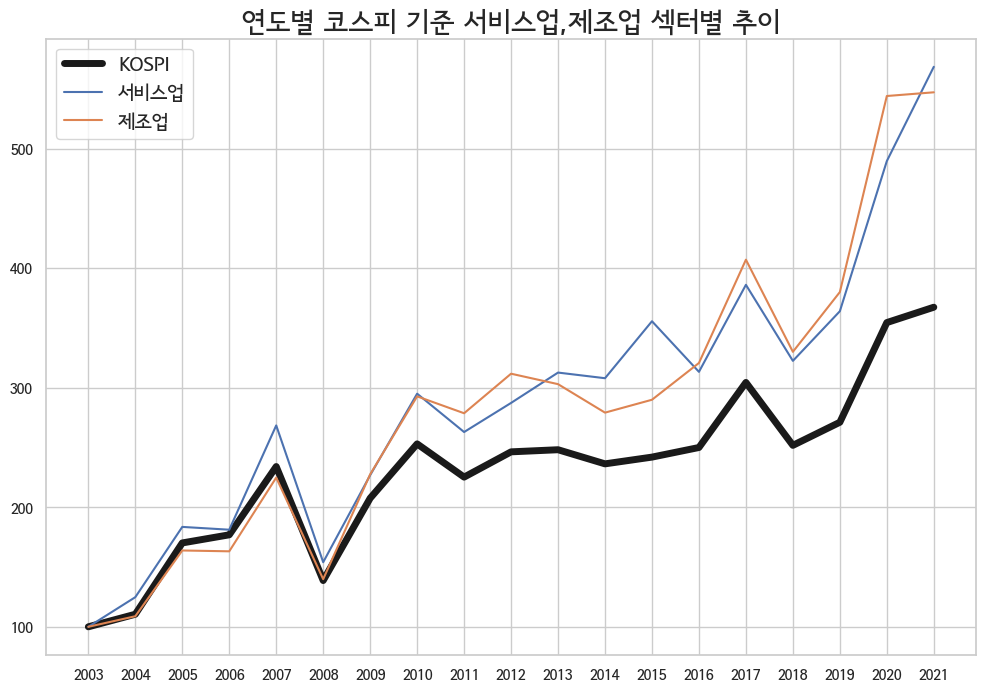

In [73]:
# Visualization: 연도별 코스피 기준 서비스업,제조업 섹터별 추이

mpl.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
xtick_label_position = list(
    range(len(df_sector_year['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_year['date'].dt.year.unique())
ax.plot(xtick_label_position, df_sector_year_코스피_index,
        linewidth=5, color='k', label="KOSPI")
ax.plot(xtick_label_position, df_sector_year_서비스업_index, label="서비스업")
ax.plot(xtick_label_position, df_sector_year_제조업_index, label="제조업")

plt.rc('axes', labelsize=15)   # x,y축 label 폰트 크기
plt.grid(True)
plt.legend(fontsize = 14)
plt.title("연도별 코스피 기준 서비스업,제조업 섹터별 추이",fontsize = 20)
plt.show()


## 연도별 코스피 기준 생활소비재 추이

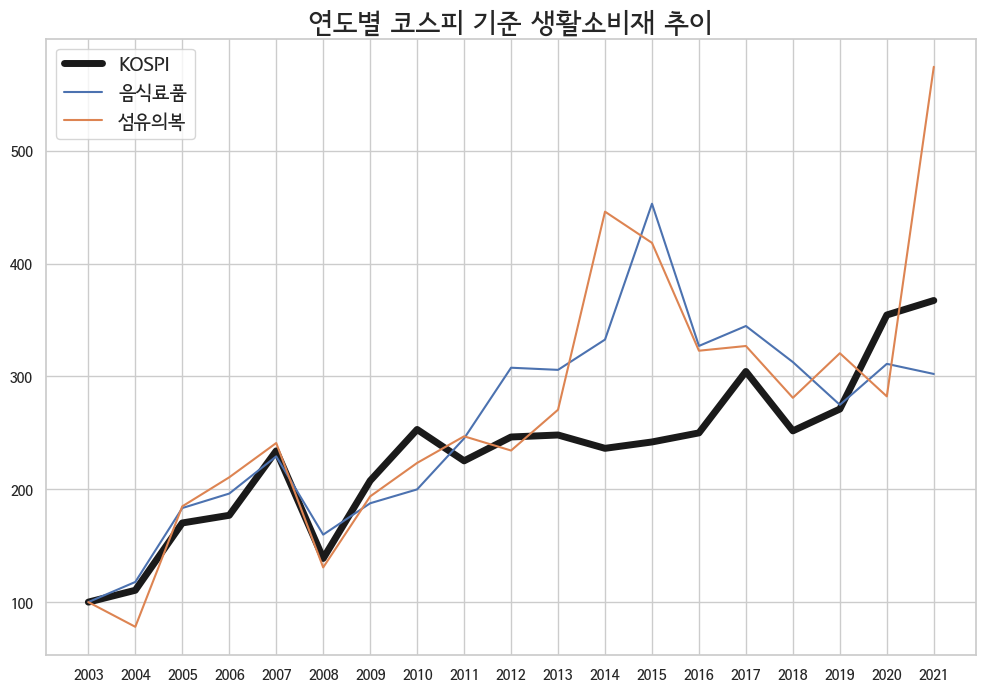

In [74]:
# Visualization: 연도별 코스피 기준 생활소비재 추이

mpl.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)

fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_year['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_year['date'].dt.year.unique())
ax.plot(xtick_label_position,df_sector_year_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(xtick_label_position,df_sector_year_음식료품_index,label = "음식료품")
ax.plot(xtick_label_position,df_sector_year_섬유의복_index,label = "섬유의복")

plt.rc('axes', labelsize=15)   # x,y축 label 폰트 크기
plt.grid(True)
plt.legend(fontsize = 14)
plt.title("연도별 코스피 기준 생활소비재 추이",fontsize = 20)
plt.show()


## 연도별 코스피 기준 재료/소재 추이

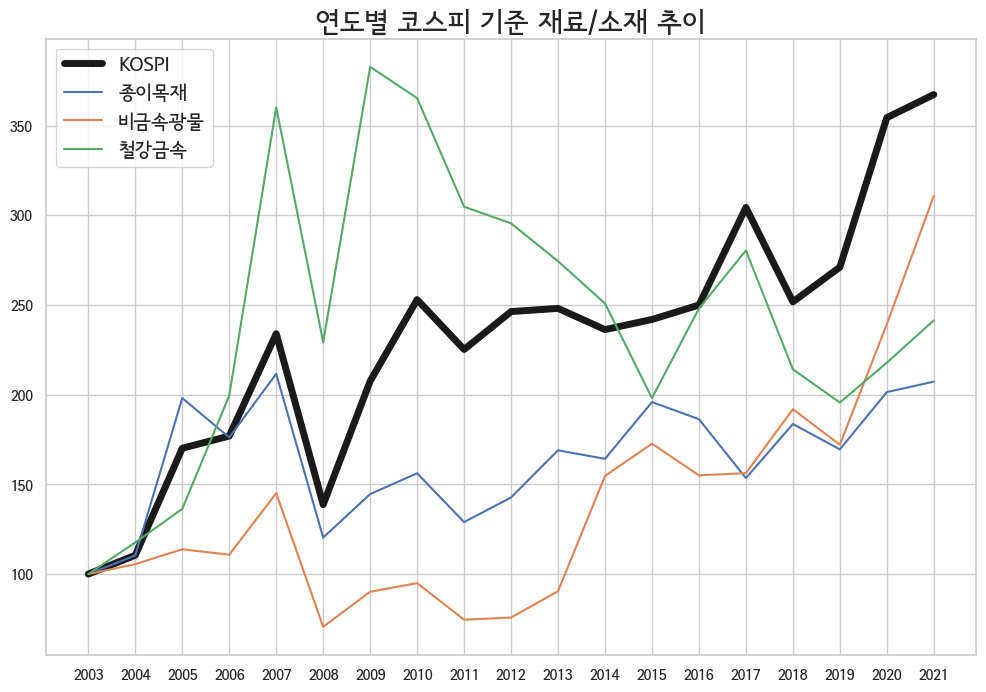

In [75]:
# Visualization: 연도별 코스피 기준 재료/소재 추이

mpl.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)

fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_year['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_year['date'].dt.year.unique())
ax.plot(xtick_label_position,df_sector_year_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(xtick_label_position,df_sector_year_종이목재_index,label = "종이목재")
ax.plot(xtick_label_position,df_sector_year_비금속광물_index,label = "비금속광물")
ax.plot(xtick_label_position,df_sector_year_철강금속_index,label = "철강금속")

plt.rc('axes', labelsize=15)   # x,y축 label 폰트 크기
plt.grid(True)
plt.legend(fontsize = 14)
plt.title("연도별 코스피 기준 재료/소재 추이",fontsize = 20)
plt.show()

## 연도별 코스피 기준 에너지/화학 추이

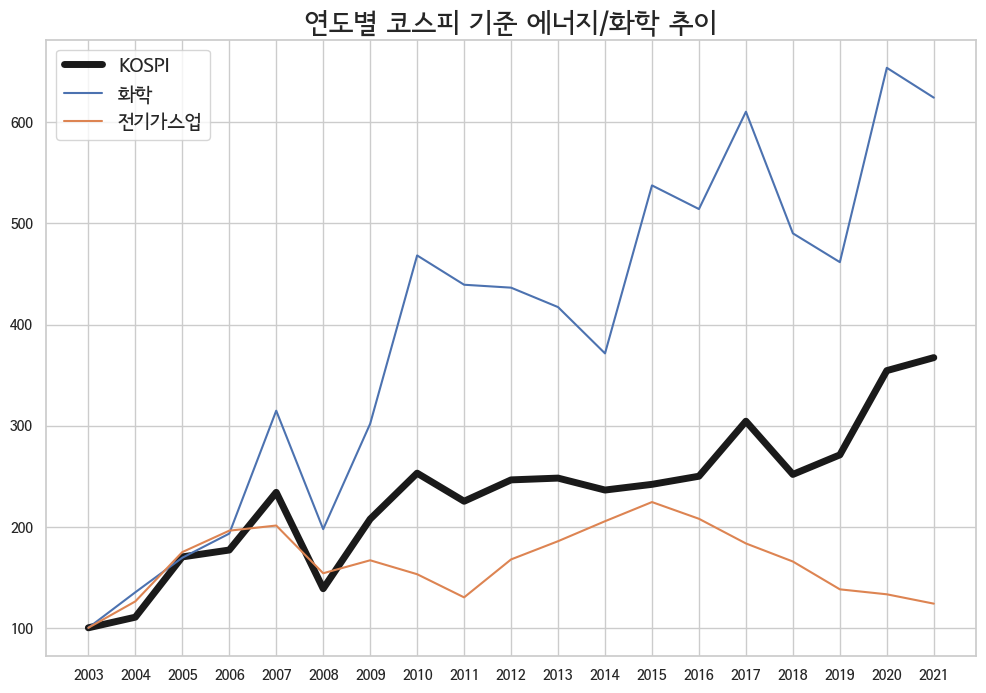

In [76]:
# Visualization: 연도별 코스피 기준 에너지/화학 추이

mpl.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)

fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_year['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_year['date'].dt.year.unique())
ax.plot(xtick_label_position,df_sector_year_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(xtick_label_position,df_sector_year_화학_index,label = "화학")
ax.plot(xtick_label_position,df_sector_year_전기가스업_index,label = "전기가스업")

plt.rc('axes', labelsize=15)   # x,y축 label 폰트 크기
plt.grid(True)
plt.legend(fontsize = 14)
plt.title("연도별 코스피 기준 에너지/화학 추이",fontsize = 20)
plt.show()


## 연도별 코스피 기준 중공업 추이

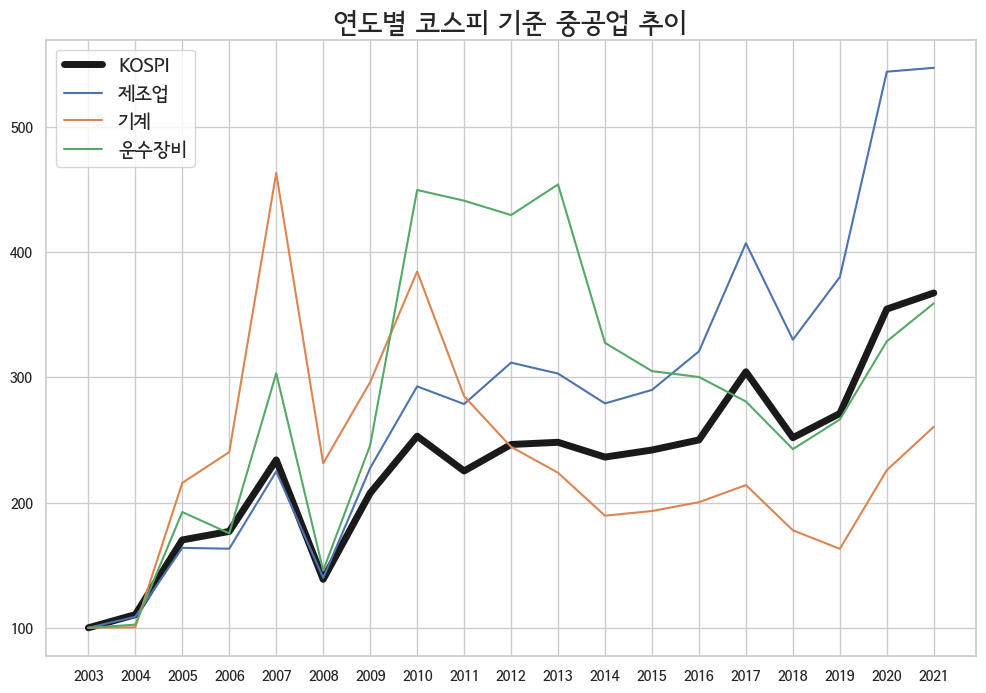

In [77]:
# Visualization: 연도별 코스피 기준 중공업 추이

mpl.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)

fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_year['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_year['date'].dt.year.unique())
ax.plot(xtick_label_position,df_sector_year_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(xtick_label_position,df_sector_year_제조업_index,label = "제조업")
ax.plot(xtick_label_position,df_sector_year_기계_index,label = "기계")
ax.plot(xtick_label_position,df_sector_year_운수장비_index,label = "운수장비")

plt.rc('axes', labelsize=15)   # x,y축 label 폰트 크기
plt.grid(True)
plt.legend(fontsize = 14)
plt.title("연도별 코스피 기준 중공업 추이",fontsize = 20)
plt.show()

## 연도별 코스피 기준 기술공업 추이

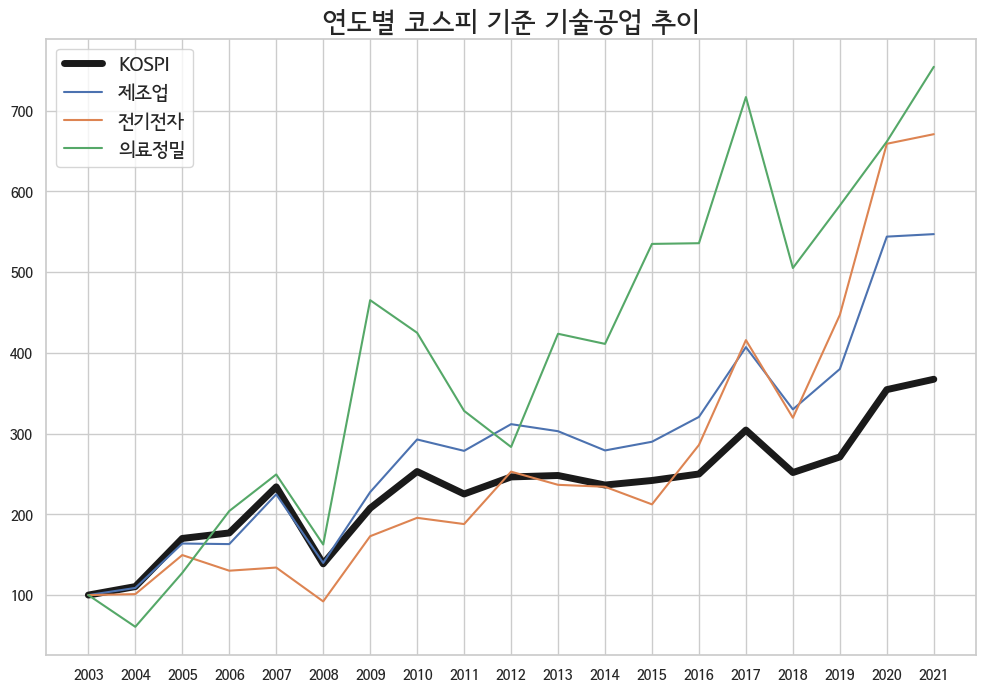

In [78]:
# Visualization: 연도별 코스피 기준 기술공업 추이

mpl.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)

fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_year['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_year['date'].dt.year.unique())
ax.plot(xtick_label_position,df_sector_year_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(xtick_label_position,df_sector_year_제조업_index,label = "제조업")
ax.plot(xtick_label_position,df_sector_year_전기전자_index,label = "전기전자")
ax.plot(xtick_label_position,df_sector_year_의료정밀_index,label = "의료정밀")

plt.rc('axes', labelsize=15)   # x,y축 label 폰트 크기
plt.grid(True)
plt.legend(fontsize = 14)
plt.title("연도별 코스피 기준 기술공업 추이",fontsize = 20)
plt.show()


## 연도별 코스피 기준 건설유통업 추이

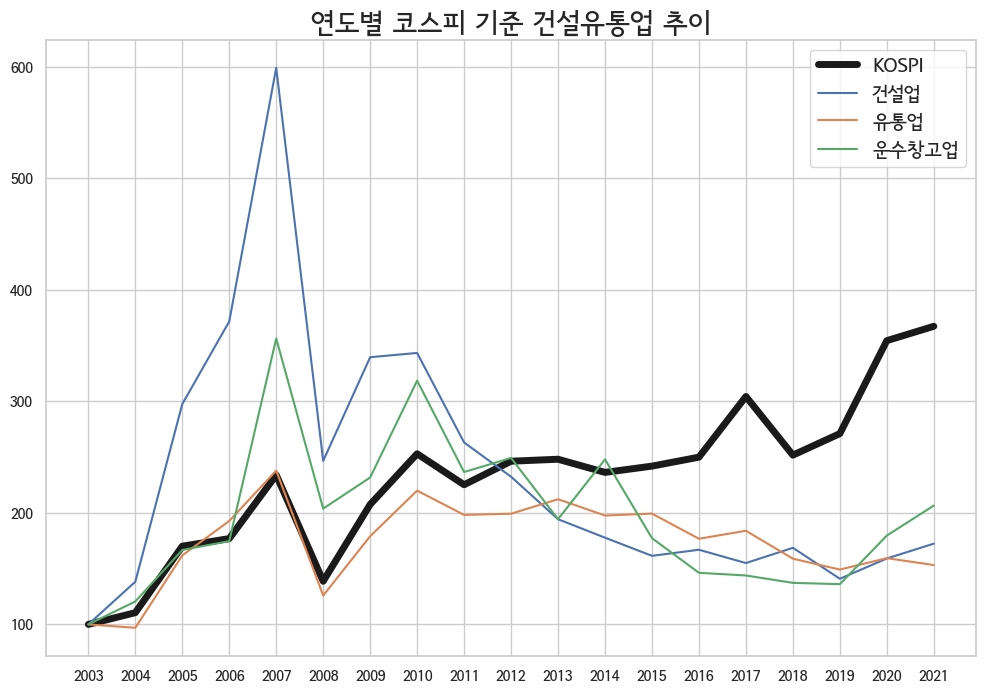

In [79]:
# Visualization: 연도별 코스피 기준 건설유통업 추이

mpl.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)

fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_year['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_year['date'].dt.year.unique())
ax.plot(xtick_label_position,df_sector_year_코스피_index,linewidth=5, color='k', label = "KOSPI")

ax.plot(xtick_label_position,df_sector_year_건설업_index,label = "건설업")
ax.plot(xtick_label_position,df_sector_year_유통업_index,label = "유통업")
ax.plot(xtick_label_position,df_sector_year_운수창고업_index,label = "운수창고업")

plt.rc('axes', labelsize=15)   # x,y축 label 폰트 크기
plt.grid(True)
plt.legend(fontsize = 14)
plt.title("연도별 코스피 기준 건설유통업 추이",fontsize = 20)
plt.show()